In [4]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#  Importing and loading dataset

In [5]:
app_data =pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#  shape of dataset


In [6]:
app_data.shape

(307511, 122)

#  Data cleaning
# finding null values

In [7]:
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
empty_col = app_data.isnull().sum()
empty_col = empty_col[empty_col. values > (0.3* len(empty_col))]
len(empty_col)

64

#### so total 64 null values we have

In [9]:
# deleting 64 columns null value columns. 
empty_col = list(empty_col[empty_col.values>=0.3*len(empty_col)].index)
app_data.drop(labels=empty_col, axis=1, inplace=True)
print(len(empty_col))

64


In [10]:
# Checking the null values with low percentage
app_data.isnull().sum() / len(app_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


### checking the outliers

In [11]:
app_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

So "AMT_ANNUITY" column is having very few null values. we should try to impute the missing values.

This column is having an outlier which is very large, it will be inappropriate to fill those missing values with mean, Hence Median comes to rescue for this and we will fill those missing blanks with median value

In [12]:
# Filling the  missing values with median

values=app_data['AMT_ANNUITY'].median()
app_data.loc[app_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [38]:
# validating the column for missing values 

app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

  now no null values in columns

In [13]:
# Removing rows having null values.
empty_row=app_data.isnull().sum(axis=1)
empty_row=list(empty_row[empty_row.values>=0.3*len(app_data)].index)
app_data.drop(labels=empty_row,axis=0,inplace=True)
print(len(empty_row))


0


In [14]:
# We will delete unwanted columns from this dataset

unwanted_cols =['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_data.drop(labels=unwanted_cols,axis=1,inplace=True)

There are some columns where the value mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable operations on them to fullfill those missing values or  delete them.

In [15]:
# let's check the columns having these 'XNA' values
    
# For Gender column

app_data[app_data['CODE_GENDER']=='XNA'].shape

(4, 28)

so there are 4 rows from gender column

In [16]:
# For Organization column

app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

HERE 55374 rows from Organization type column

In [17]:
# describing the 'gender' column to check the female and male counts
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

We have females count more  and only 4 rows are having NA,so we can update the NA with Female count, however it will not impact  our data.

In [18]:
# Updating a column 'CODE_GENDER' with "F" for the dataset

app_data.loc[app_data['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [19]:
# Describing the 'ORGANIZATION_TYPE' column
app_data['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

for column 'ORGANIZATION_TYPE', if we drop the rows of total 55374,we  will not have any major impact on our dataset. Because it is only 18% of the total count.

In [20]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [58]:
# Casting all the variable into numeric in the data set 

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

app_data[numeric_columns]=app_data[numeric_columns].apply(pd.to_numeric)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


### Derived Metrics


Creating bins for the  continous variable of  categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [21]:
# creating  Bins for income_amount  

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [22]:
# creating  bins for credit_amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slots)

Now we easily divide the dataset into 2 datasets of target =1 for applicants who has difficulties in paying loans and another is target =0 for rest of all.

In [23]:
target_0= app_data.loc[app_data['TARGET']==0]
target_1= app_data.loc[app_data['TARGET']==1]


so,Now we will calculate the percentage because, we have an imbalance in the data, and majority we have is target 0.

In [24]:
# calculating the % percentage
round(len(target_0) / len(target_1), 2)

10.55

so we got the Imbalance ratio is 10.55


Univariate Analysis for Categories,

Doing the categorical univariate analysis in logarithmic scale for target_0

In [25]:
# Count plotting in logarithmic scale

def univariate_plot(df,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 24
    plt.rcParams['axes.titlesize'] = 28
    plt.rcParams['axes.titlepad'] = 32
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(app_data[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = app_data, x= col, order=app_data[col].value_counts().index,hue = hue,palette='inferno') 
        
    plt.show()

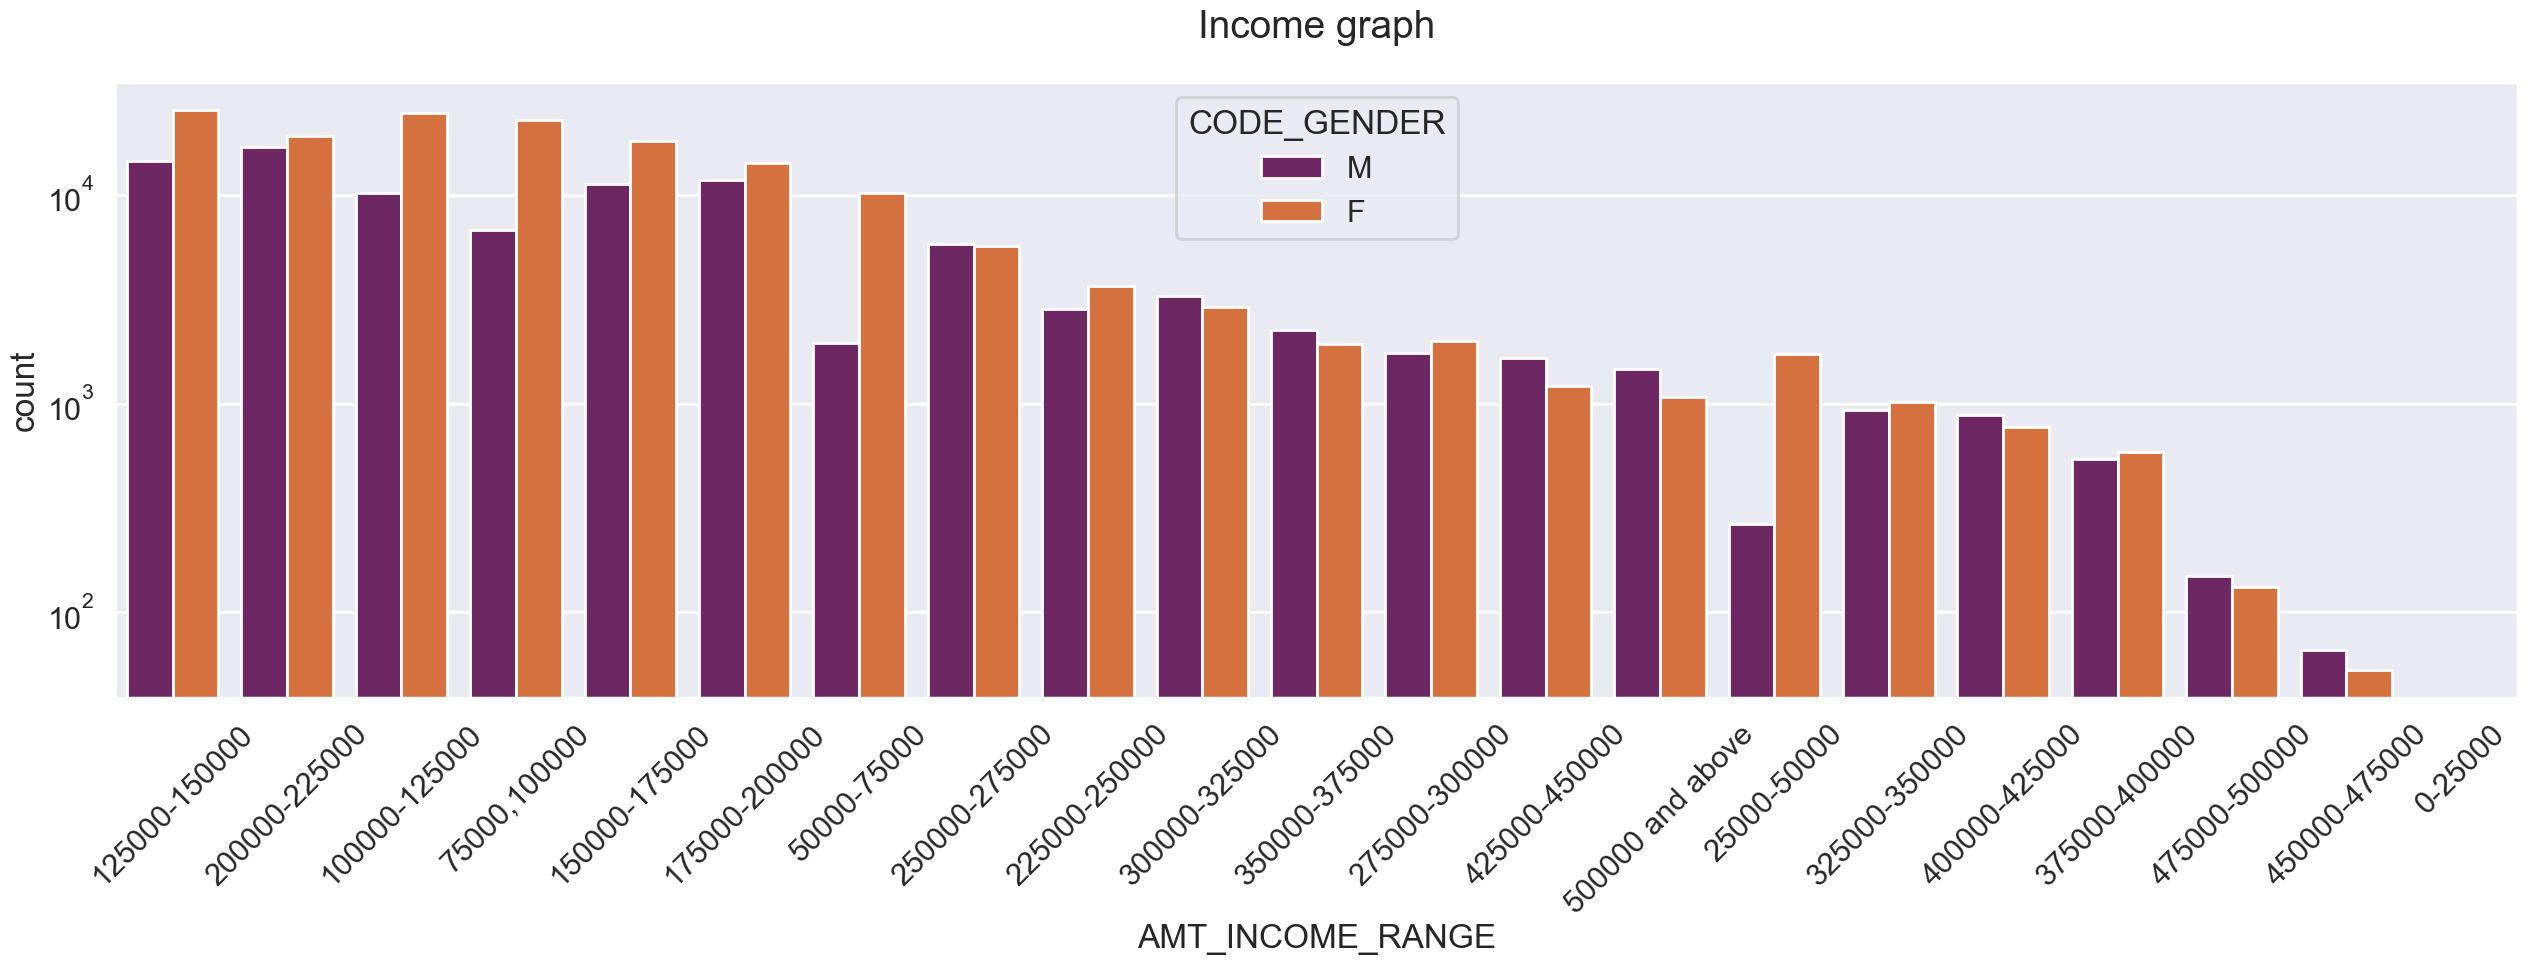

In [79]:
# plotting for income 
univariate_plot(target_0, col= 'AMT_INCOME_RANGE', title= 'Income graph', hue='CODE_GENDER')


### Observations:

=>The range of income between 100k and 200k shows  a higher impact  of credited instances.

=> Female counts surpass those of males,In 10 sections, although there exist instances where males have higher counts, with one section having equal counts for both genders.

=>Within this income range, females predominantly receive credits.

=>Instances of income exceeding 400k must be noted.

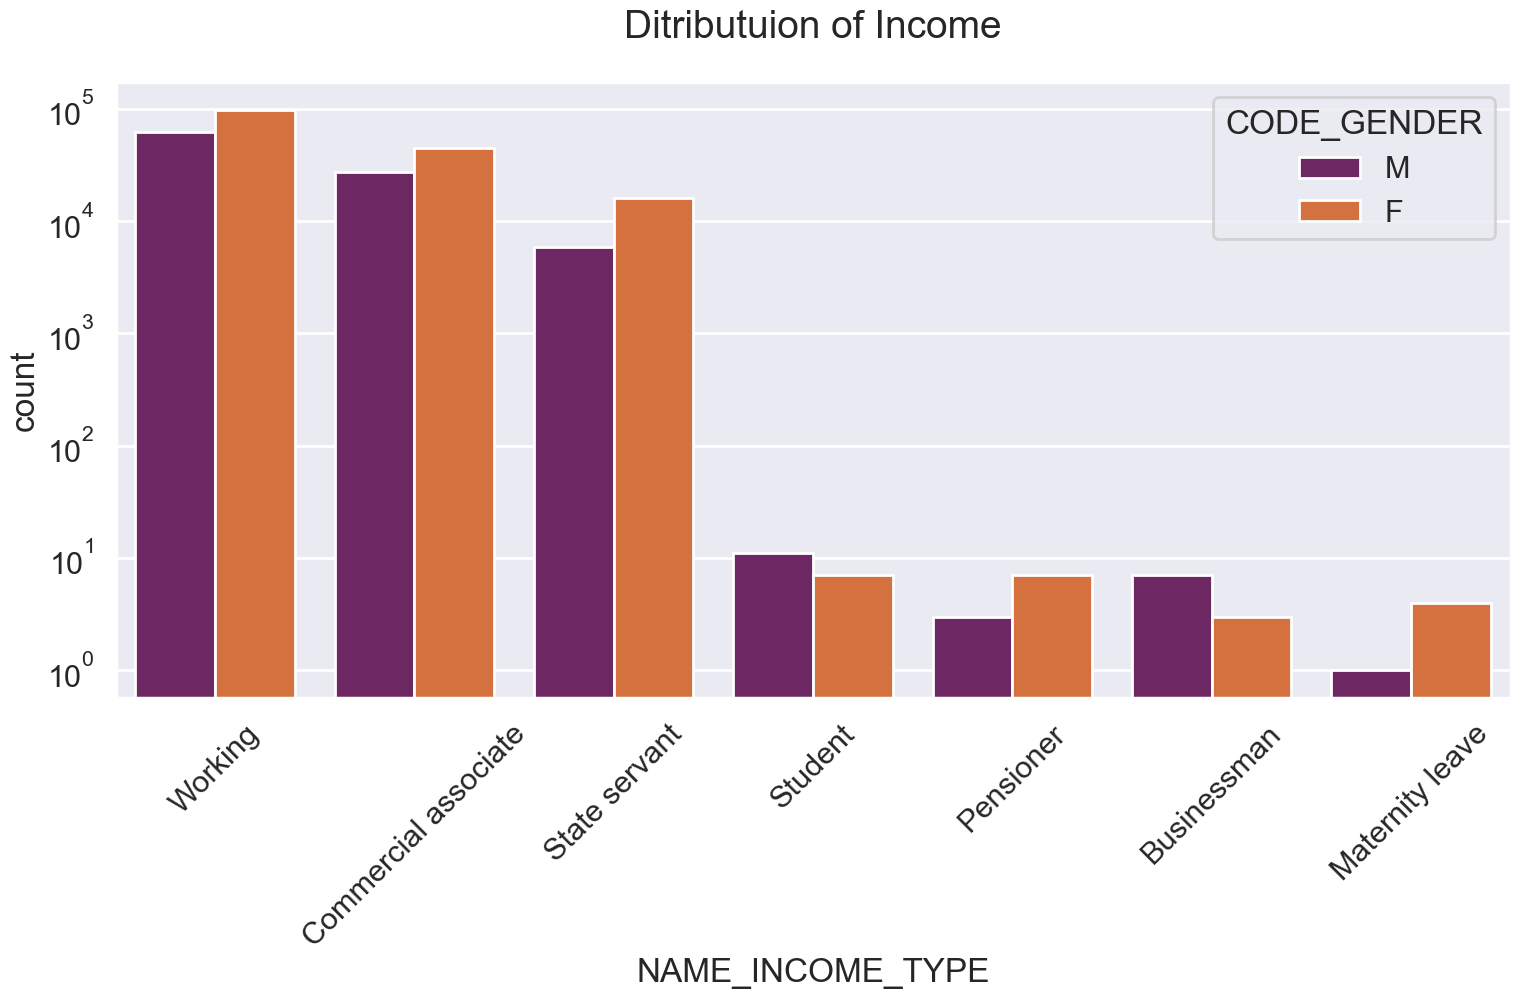

In [26]:
# Plotting for income types

univariate_plot(target_0, col='NAME_INCOME_TYPE', title='Ditributuion of Income', hue='CODE_GENDER')


Observations from the Graph:

- Notably, income types like 'student', 'pensioner', and 'Businessman'do not have any instances of late payments, indicating a lack of occurrences in this context

- Among income types such as 'working', 'commercial associate', and 'State Servant', the count of credits is higher and compared to 'Maternity leave'.
- Additionally, females have a greater count of credits than males in these income types.
- 'Maternity leave' shows a lower number of credits.





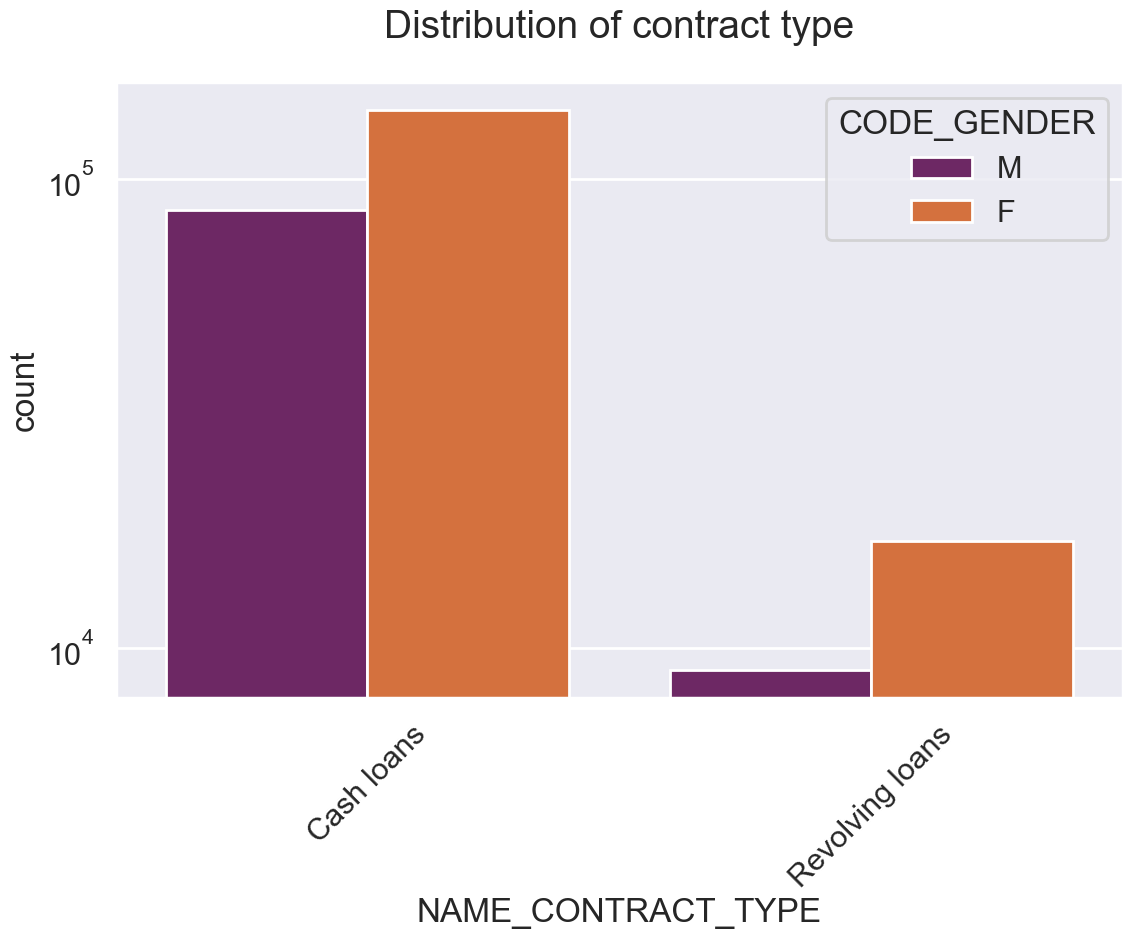

In [27]:
# Plotting for contract type

univariate_plot(target_0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

 Observations from graph:

- The number of credits is  greater for the 'cash loans' contract type compared to the 'Revolving loans' contract type.
- Similarly, in this context, female applicants are demonstrate a higher tendency to apply for credits.

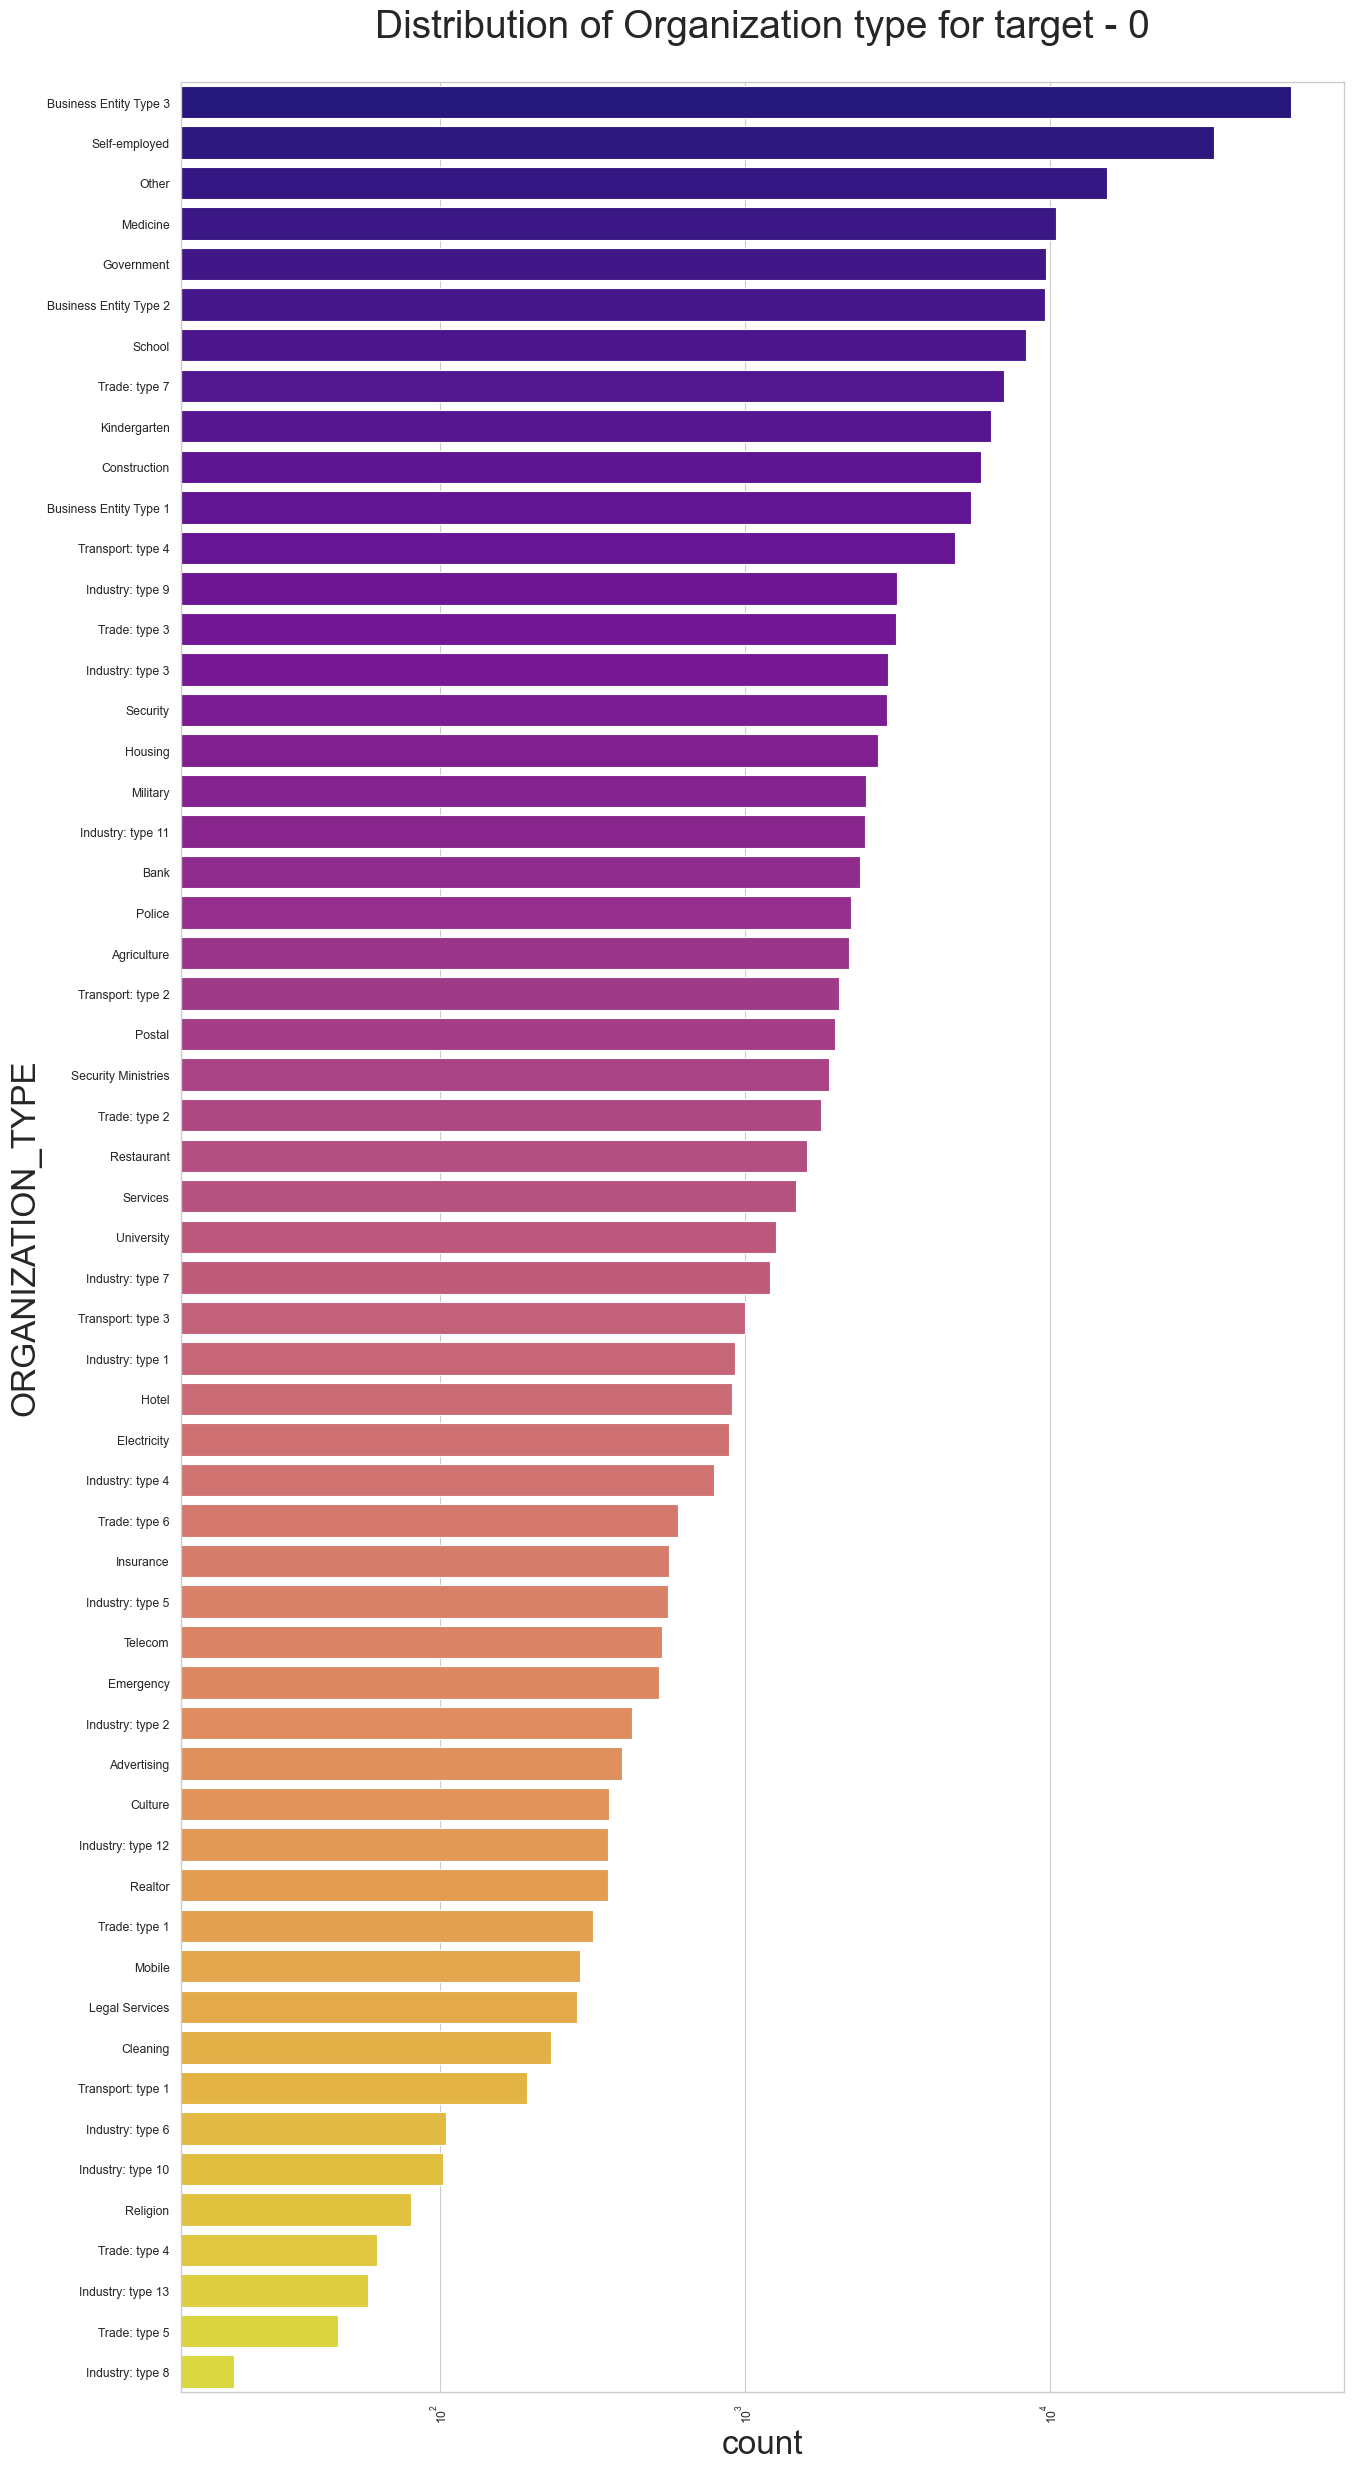

In [28]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 24
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titlepad'] = 32

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='plasma')

plt.show()

Main observations from the graph:

- Credit applicants primarily belong to diverse organization types,including 'Business entity Type 3', 'Self employed', 'Other', 'Medicine', and 'Government'.
- There is a lower representation of clients originating from the Industry types 8, 6, and 10, as well as specific categories such as religion and trade type 5 and 4.

### Univariate Categorical Analysis

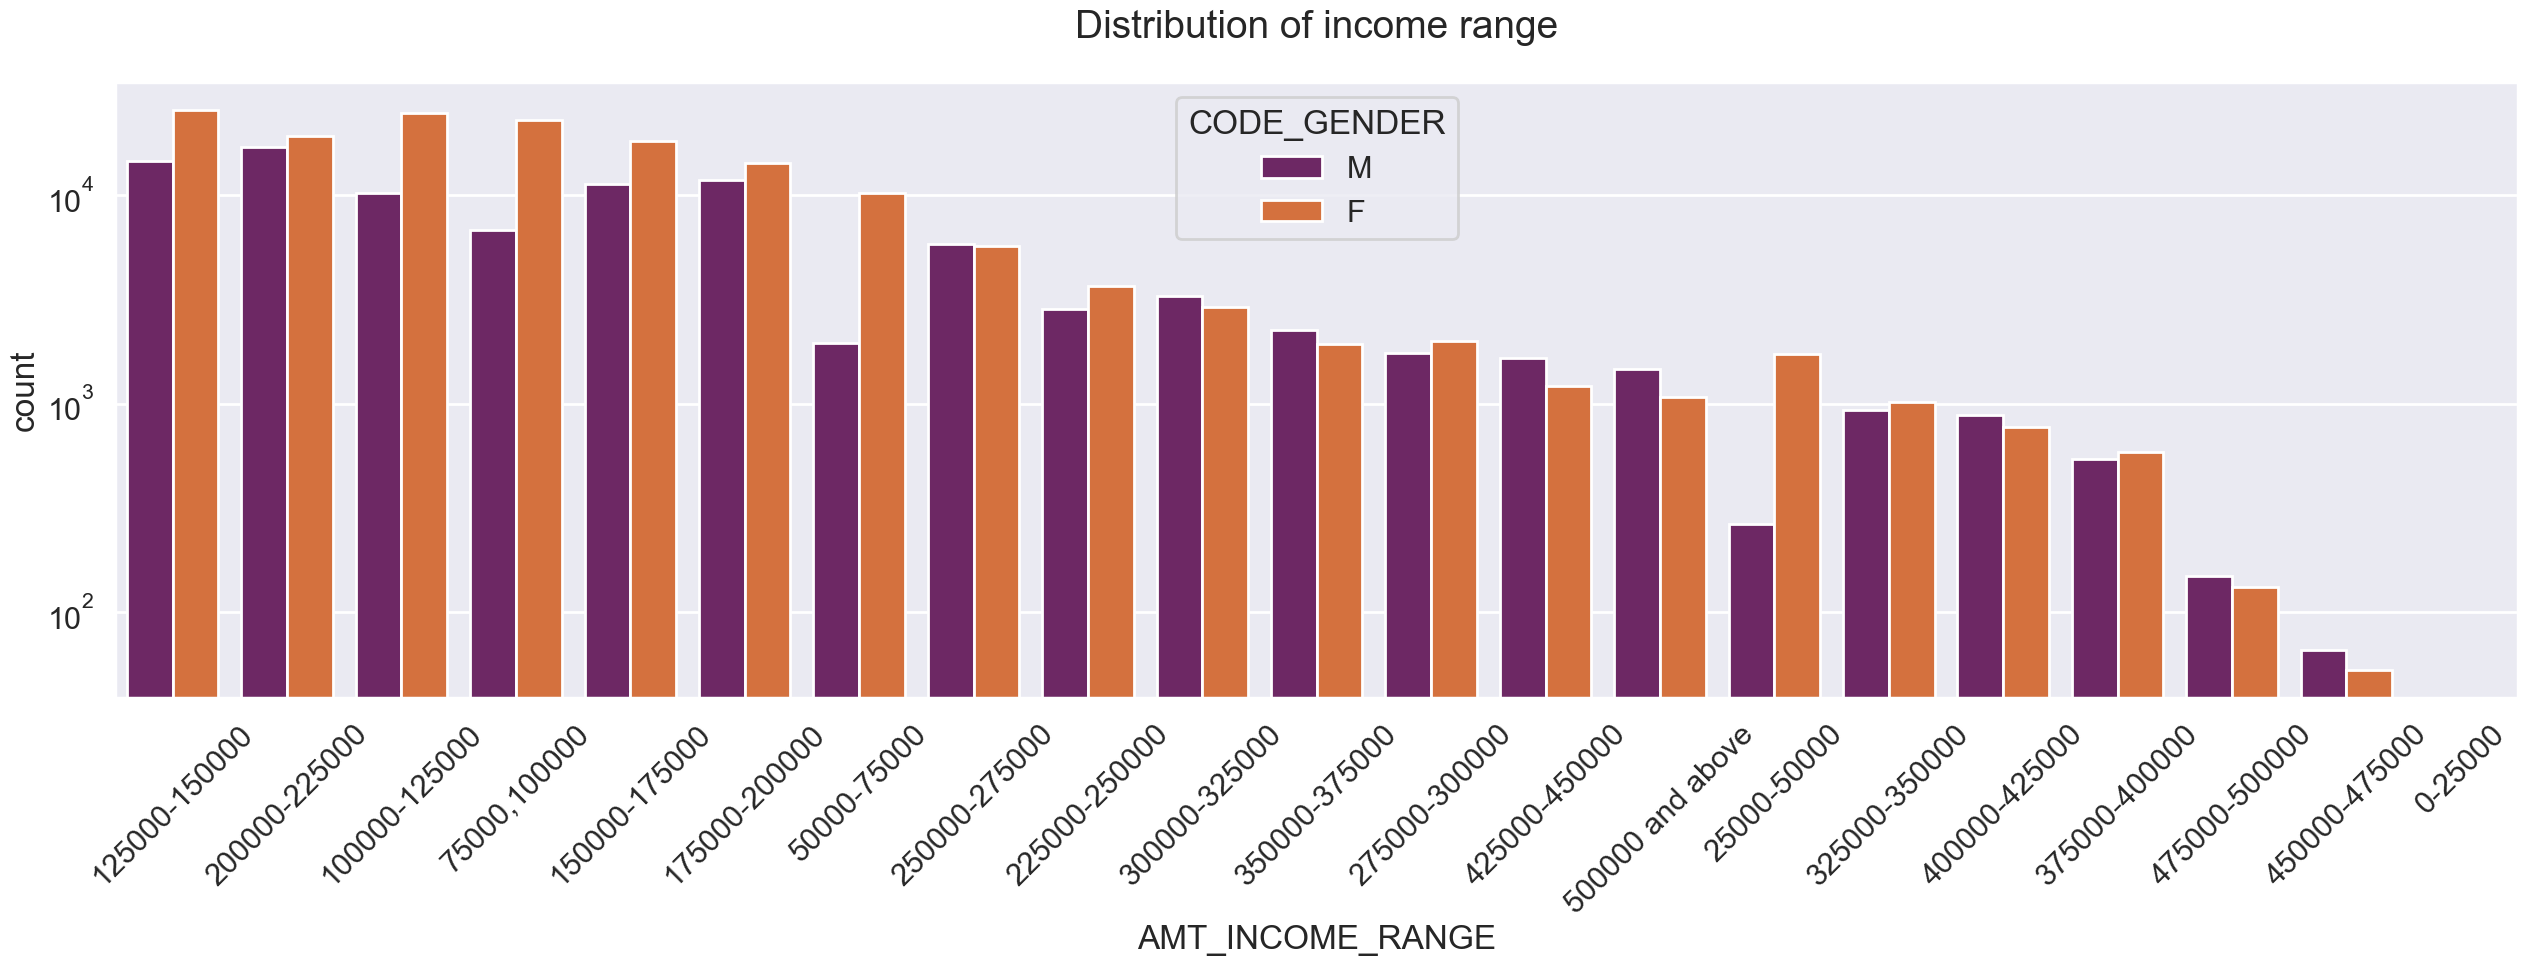

In [29]:
# PLotting for income range

univariate_plot(target_1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

observations from  graph:

- The credit count is notably higher within the income range of 100000 to 200000.
- Male population surpasses the count of females.
- This visualization underscores the predominance of males in securing credits within this income bracket.
- There is a minimal occurrence of instances within the income range of 400000 and above.




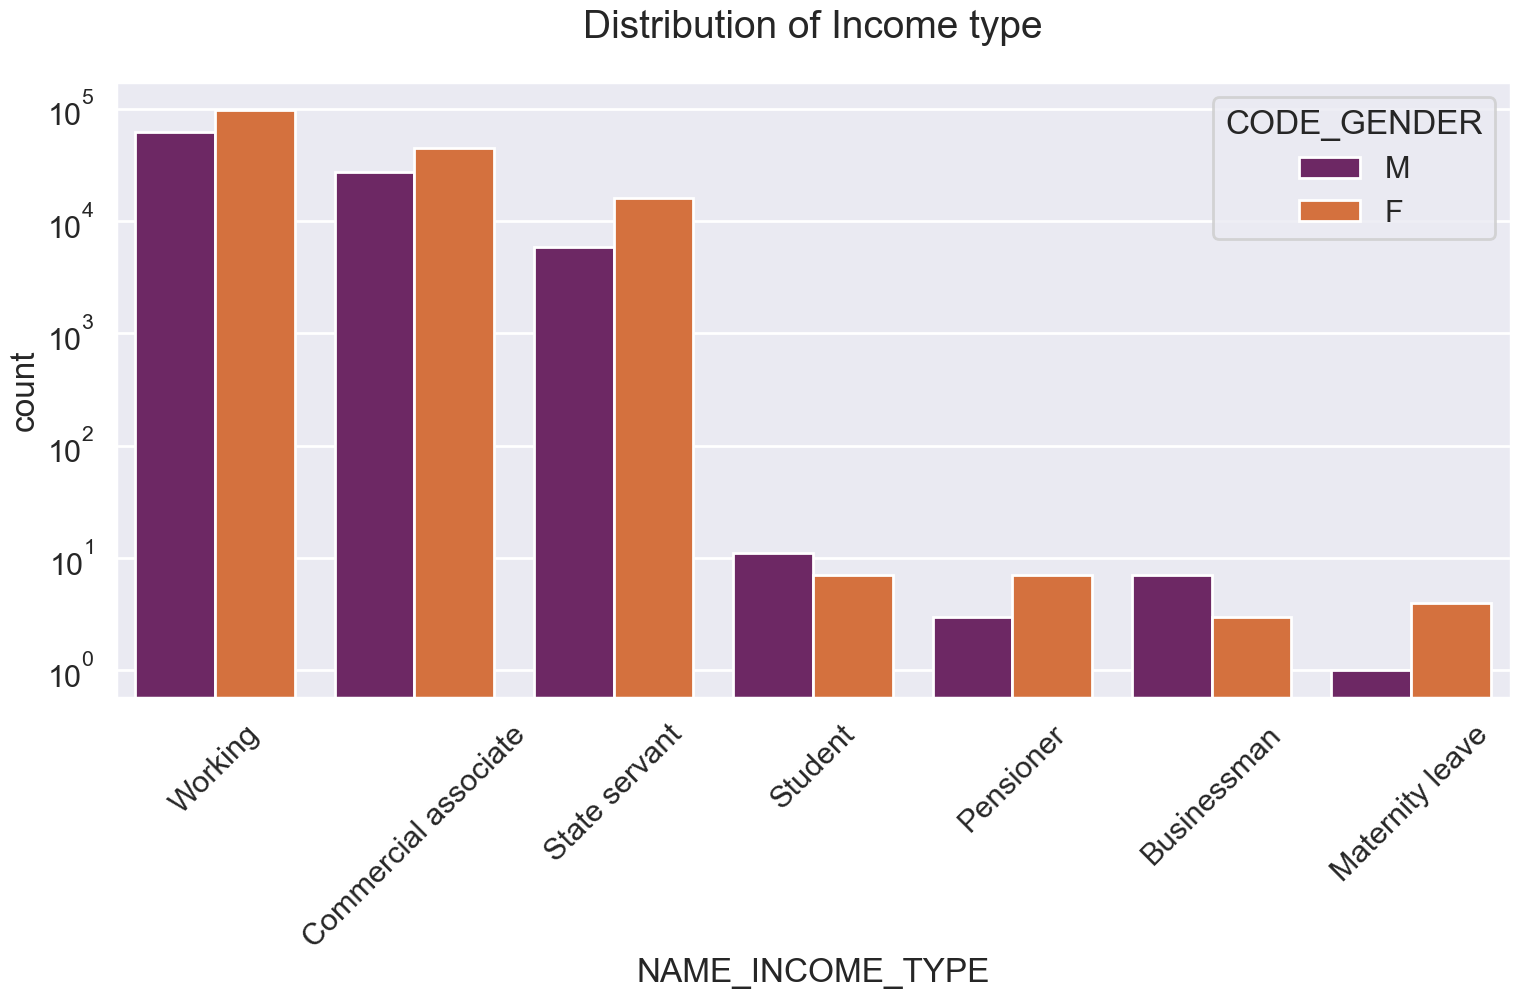

In [30]:
# Plotting for Income type

univariate_plot(target_1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Key insights drawn from the  graph:

- The prevalence of credits is notably higher for income types labeled as 'working', 'commercial associate', and 'State Servant' compared to other categories like 'Maternity leave'.
- Within this context, females exhibit a higher credit count compared to males.
- A limited number of credits are associated with the 'Maternity leave' income type.
- Notably, for income type '1', there are no instances of 'student', 'pensioner', or 'Businessman', implying their absence in delayed payments.

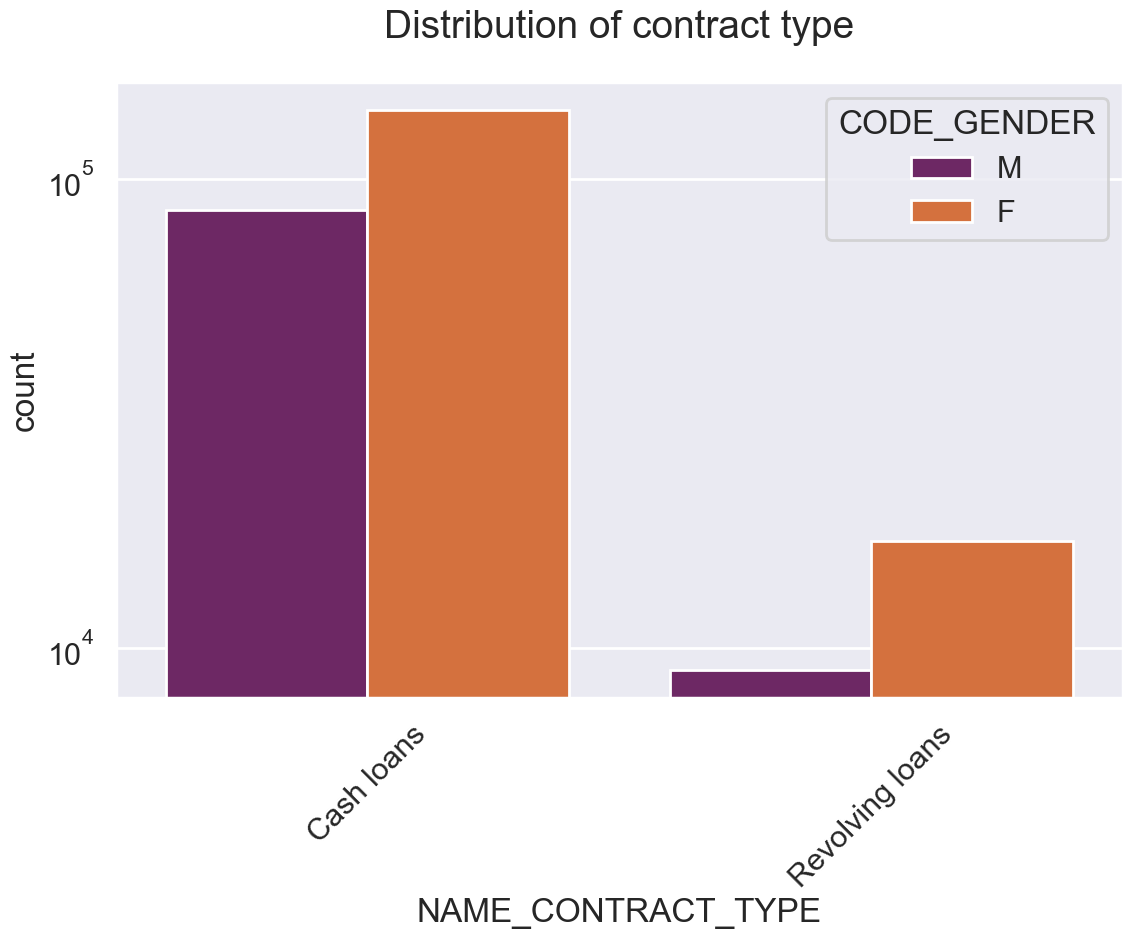

In [31]:
# Plotting for Contract type

univariate_plot(target_1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points are concluded from the above graph.

1. For contract type ‘cash loan’ is having more number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For type 1 :there is only Female Revolving loans.

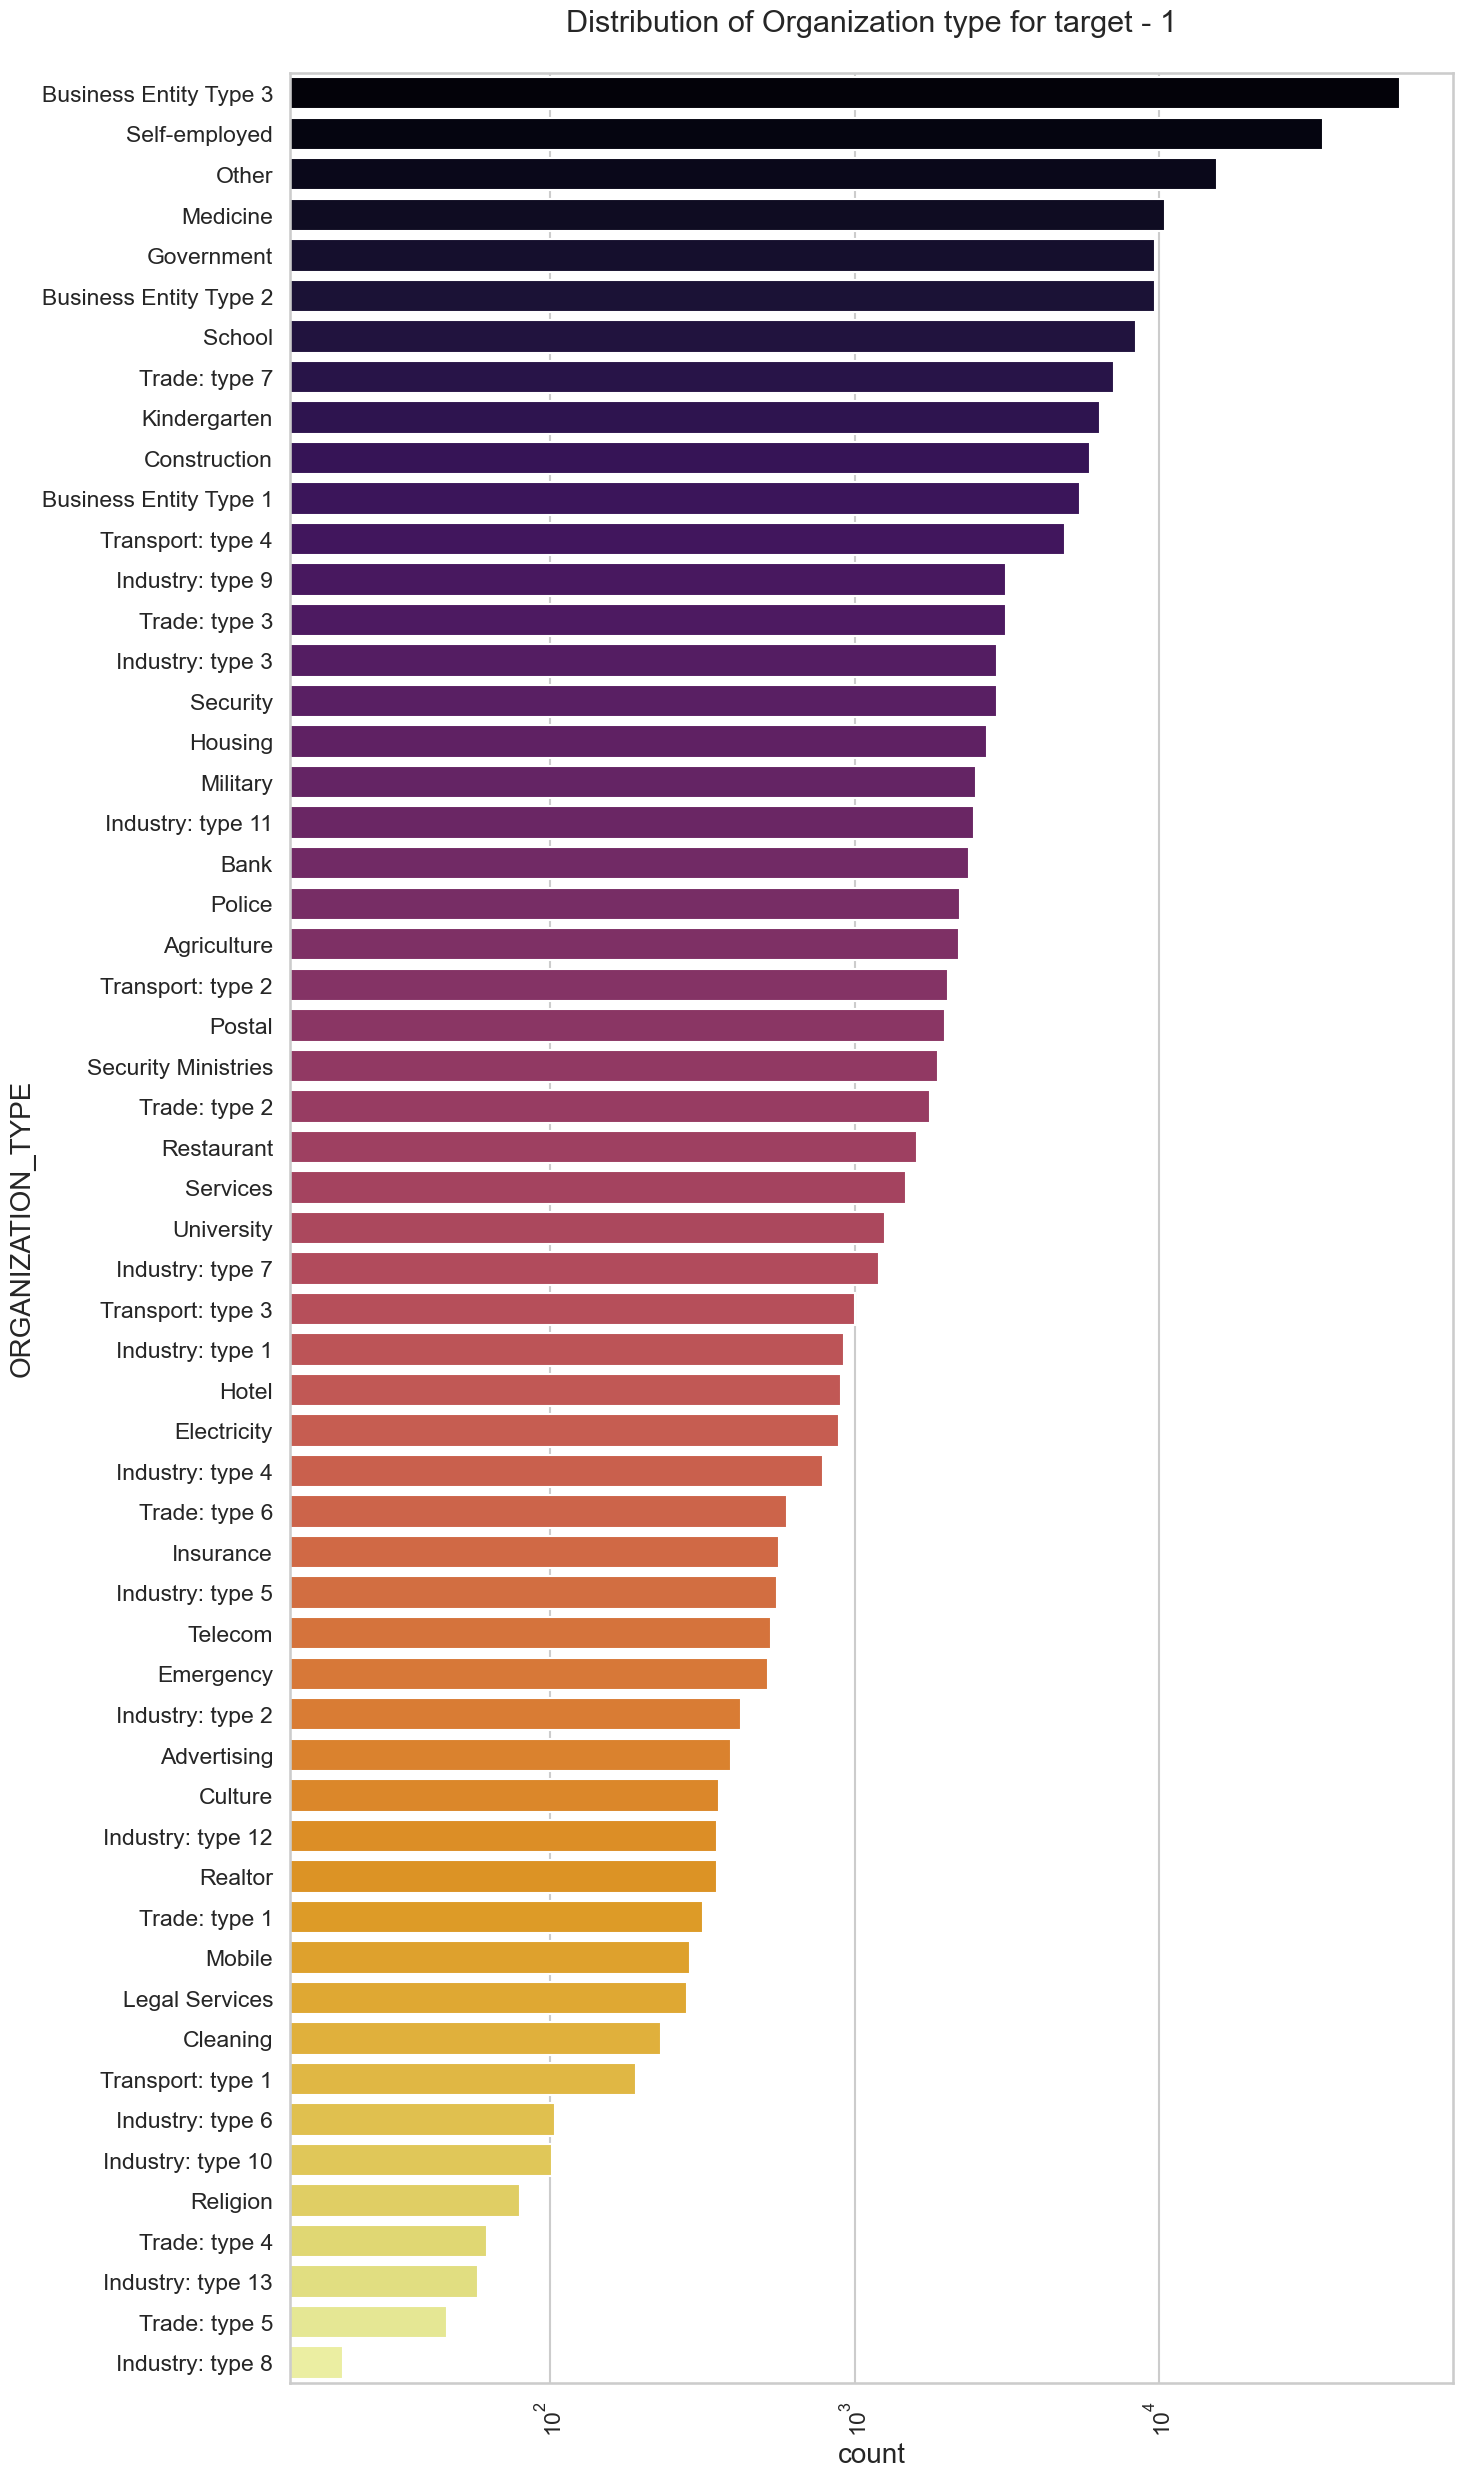

In [32]:
# Plotting the graph for  Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='inferno')

plt.show()

observations extracted from the provided graph:

- Credit applicants predominantly originate from a diverse set of organization types, notably including 'Business entity Type 3', 'Self employed', 'Other', 'Medicine' and 'Government'.
- In contrast, there is a lower representation of clients hailing from Industry types 8, 6, and 10, as well as specific categories such as religion and trade type 5 and 4.
- similar kind of patterns in the distribution of organization types are discernible for type 0.



## correlation for numerical columns

In [33]:
# Finding some of the correlation for numerical columns for target '1' and '0'  
target0_corr=target_0.iloc[0:,2:]
target1_corr=target_1.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')


In [34]:
# correlation target 0 
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [76]:
# correlation target 1
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


In [87]:
# plotting the above correlation with heat map as it is the best choice to visulaize

# figure size shown

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map one of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

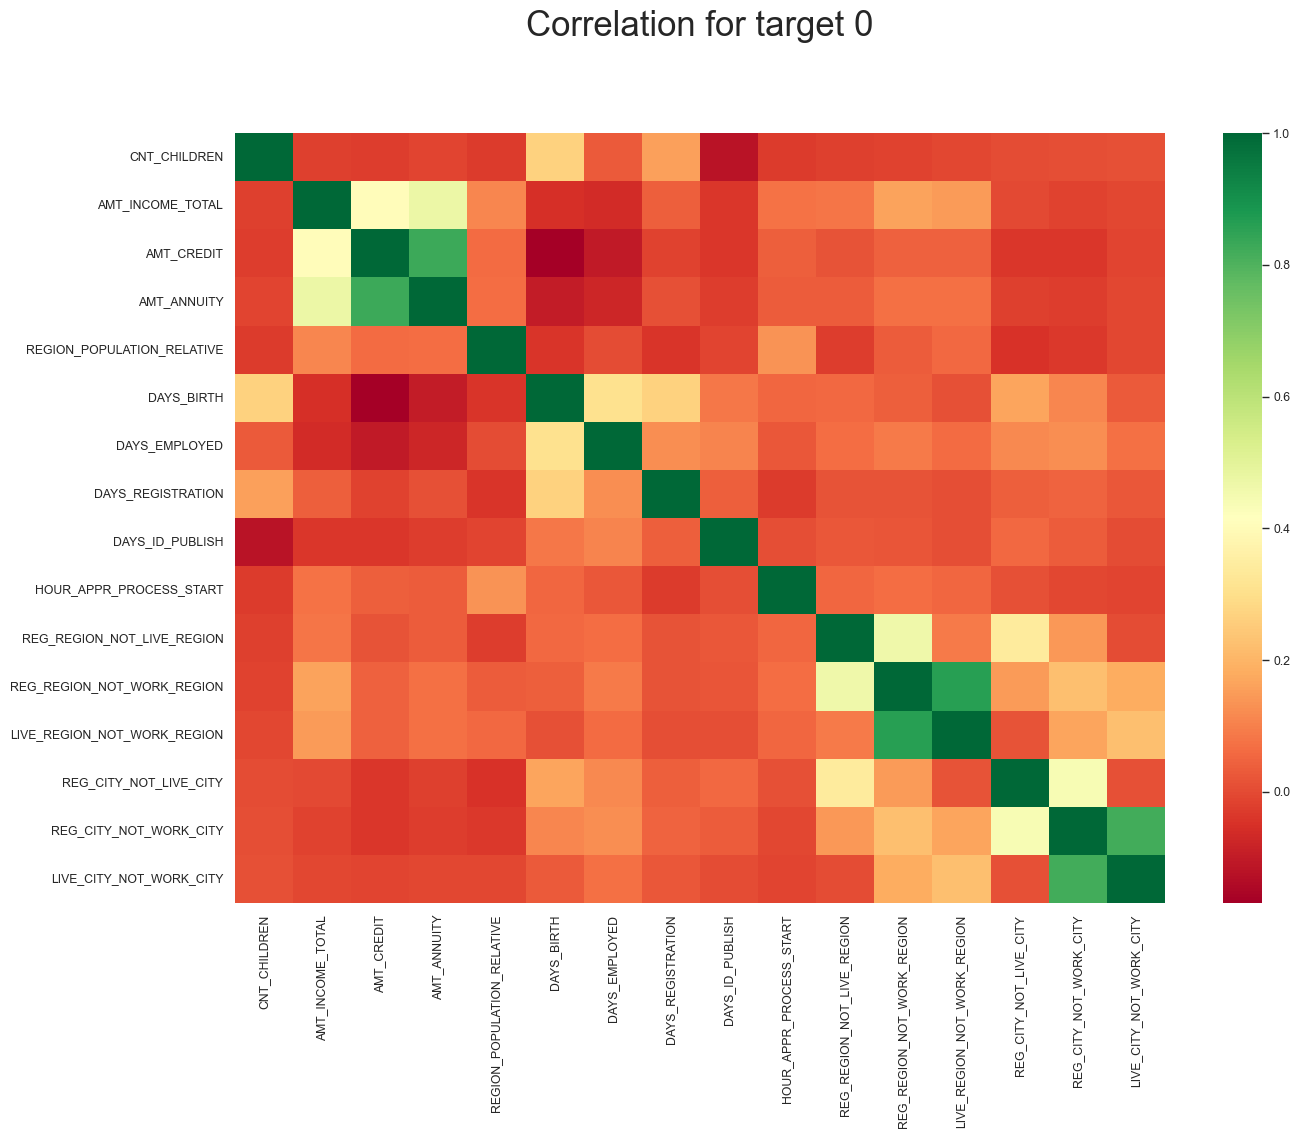

In [88]:
# Heatmap for target 0 
targets_corr(data= target0, title='Correlation for target 0')

Analysing the correlation frpm above heatmap , we can deduce several noteworthy observations:

- The income amount showcases an inverse correlation with the number of children a client has, clients with fewer children trend to have higher income, and vice versa.
- Credit amount demonstrates an inverse correlation with the number of children a client has, suggesting that clients with fewer children trend to have higher credit amounts, and vice versa.
- There exists an inverse relationship between credit amount and the client's age, implying that lower age is associated with higher credit amounts and vice versa.
- Densely populated areas seem to have fewer clients with children.
- Higher credit amounts are linked with densely populated areas.
- Densely populated areas exhibit higher income levels as well.

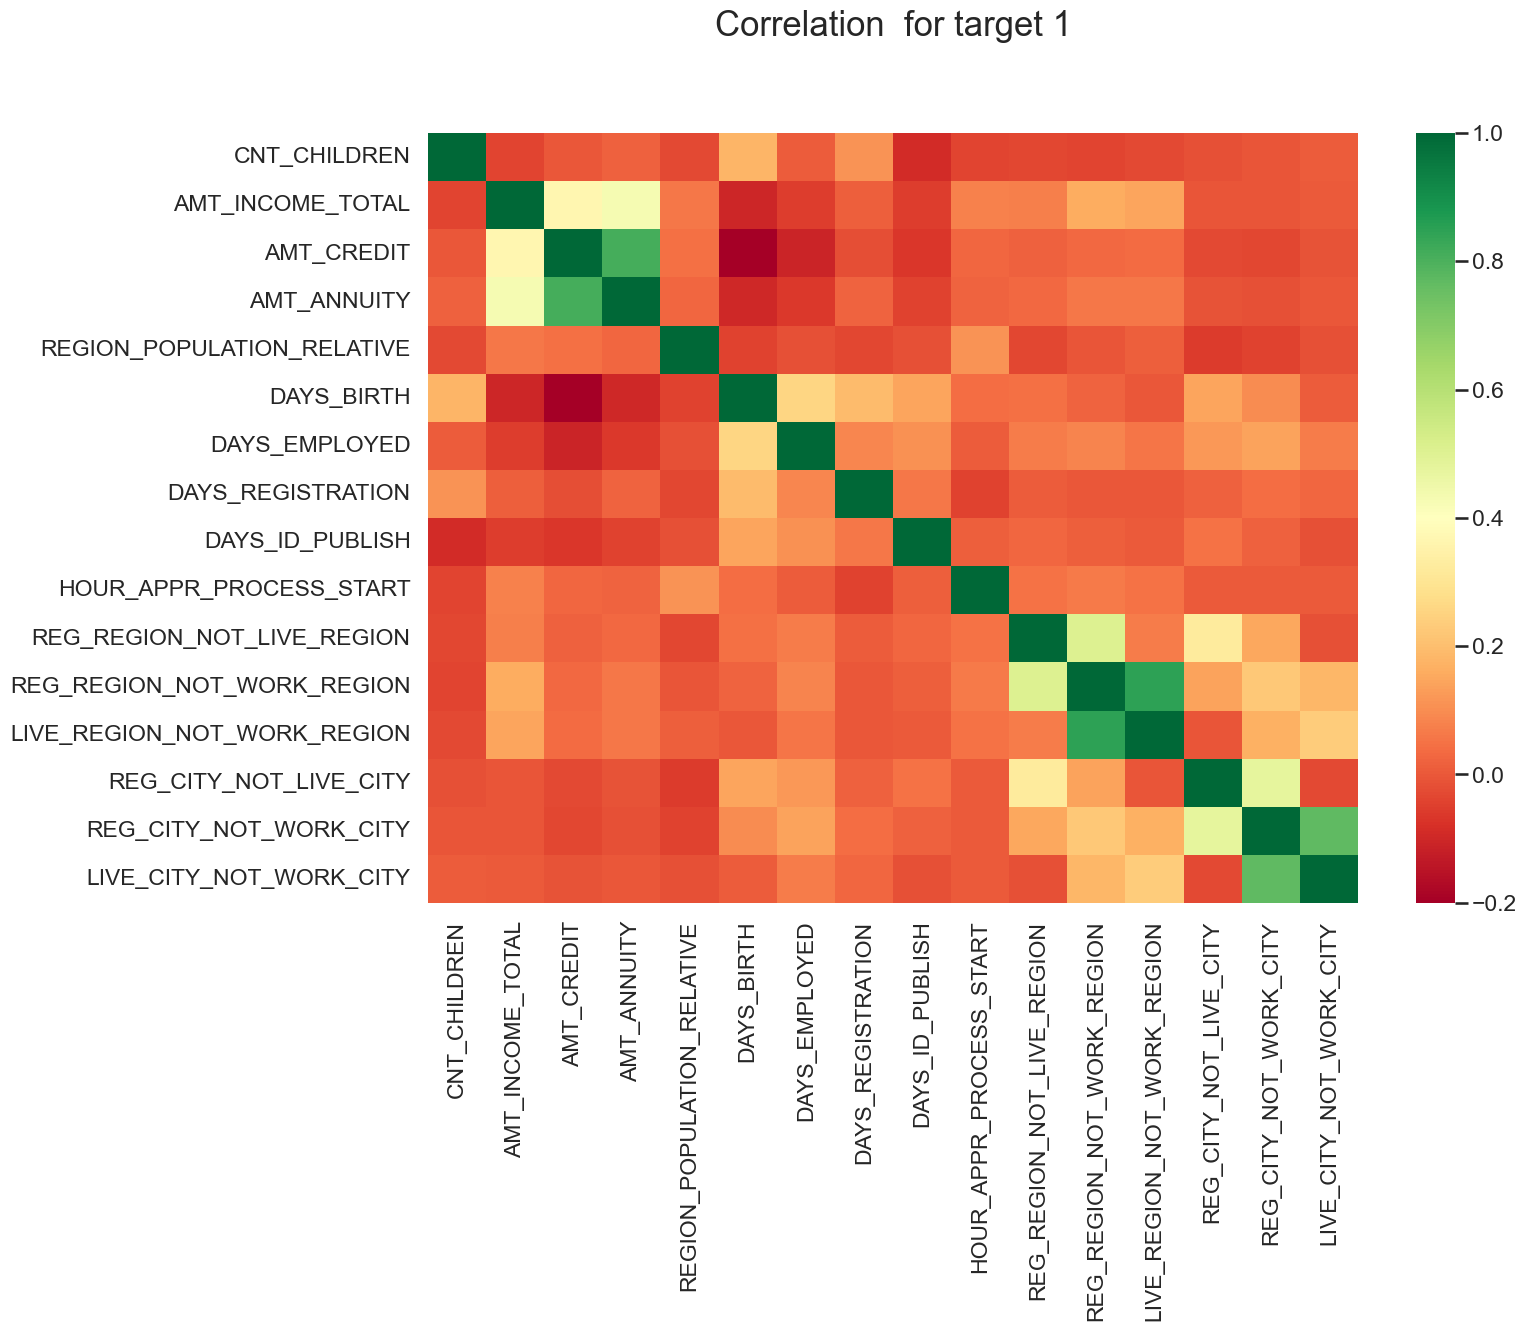

In [37]:
# Target 1 

targets_corr(data= target1, title='Correlation  for target 1')

The correlation heatmap for Target 1 reveals similar patterns to Target 0, but with a few distinct observations:

- Clients whose permanent address does not match the work address also trend to have fewer children, and the converse holds as well.
- Clients whose permanent address does not match the contact address trend to have fewer children, and the reverse is also true.




### Conclusion from Univariate Categorical Analysis:
- From Univariate Categorical analysis we can conclude it is safe to approve loans to homeowners and highly educated individuals, particularly skilled professionals such as Core/HR/IT/Manager/Medicine staff, and those married.
- Also good to ignore the low-skilled laborers, lower education levels, and those on extended leaves like maternity.

### Univariate Analysis for Variables

In [38]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 12
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['axes.titlepad'] = 18
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target_1, x=col,orient='v')
    plt.show()
    

For target 0 - Finding any outliers

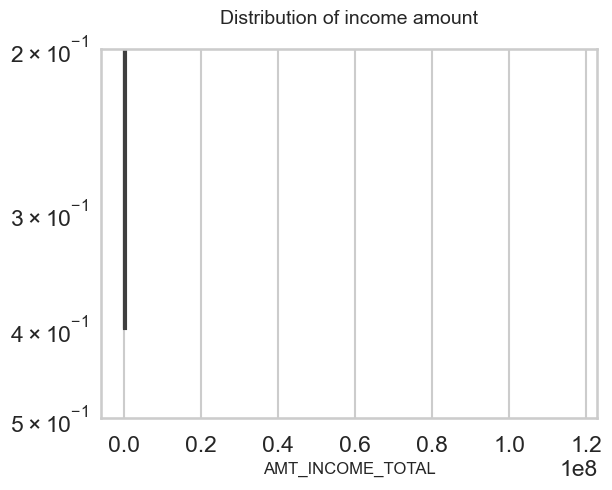

In [39]:
univariate_numerical(data=target_0,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

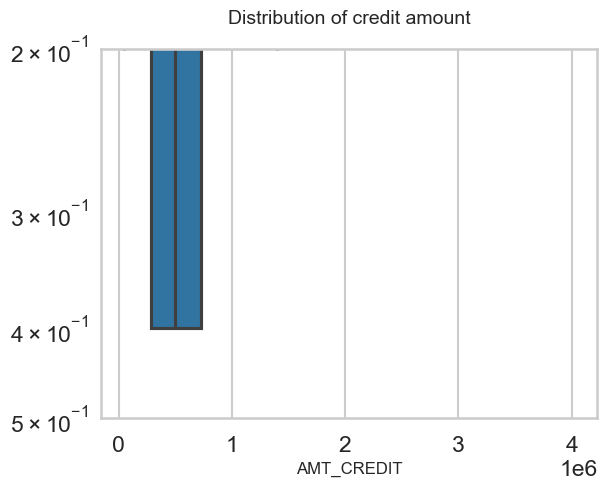

In [102]:
# Distribution of credit amount
univariate_numerical(data=target_0,col='AMT_CREDIT',title='Distribution of credit amount')

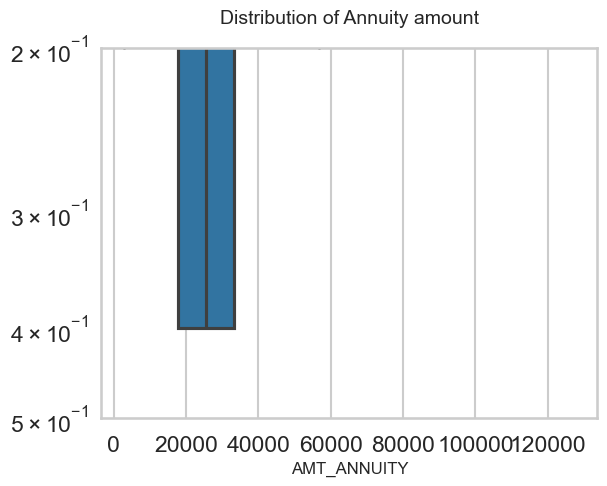

In [41]:
# Distribution of anuuity amount

univariate_numerical(data=target_0,col='AMT_ANNUITY',title='Distribution of Annuity amount')

For Target 1 - Finding the outliers

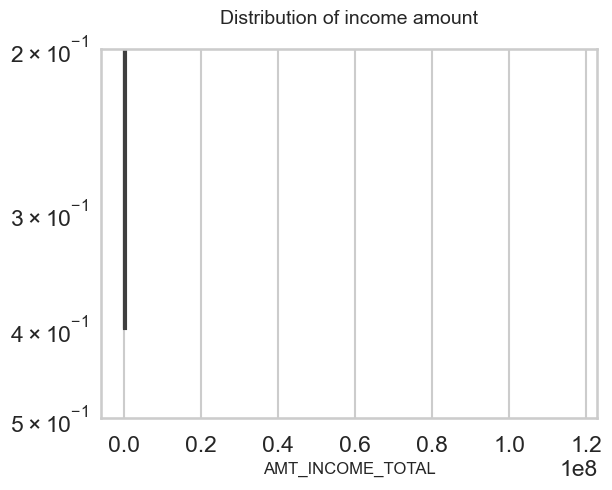

In [42]:
# Distribution of income amount

univariate_numerical(data=target_1,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

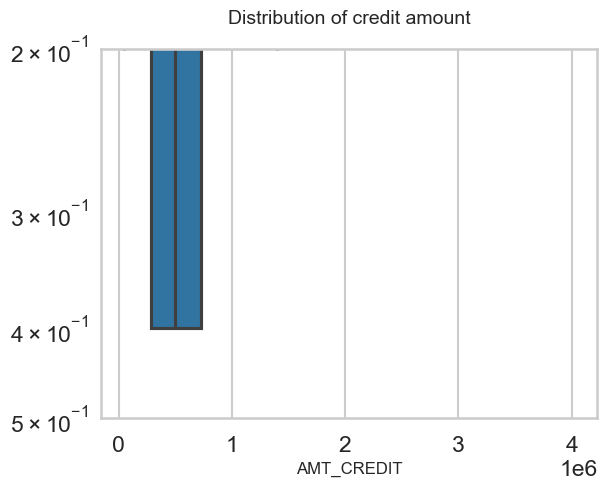

In [43]:
# Distribution of credit amount

univariate_numerical(data=target_1,col='AMT_CREDIT',title='Distribution of credit amount')

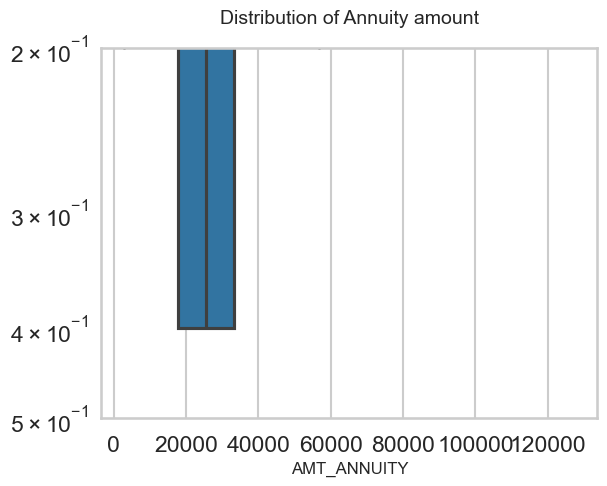

In [44]:
# Distribution of Annuity amount

univariate_numerical(data=target_1,col='AMT_ANNUITY',title='Distribution of Annuity amount')



**Bivariate analysis for numerical variables**

**For Target 0**


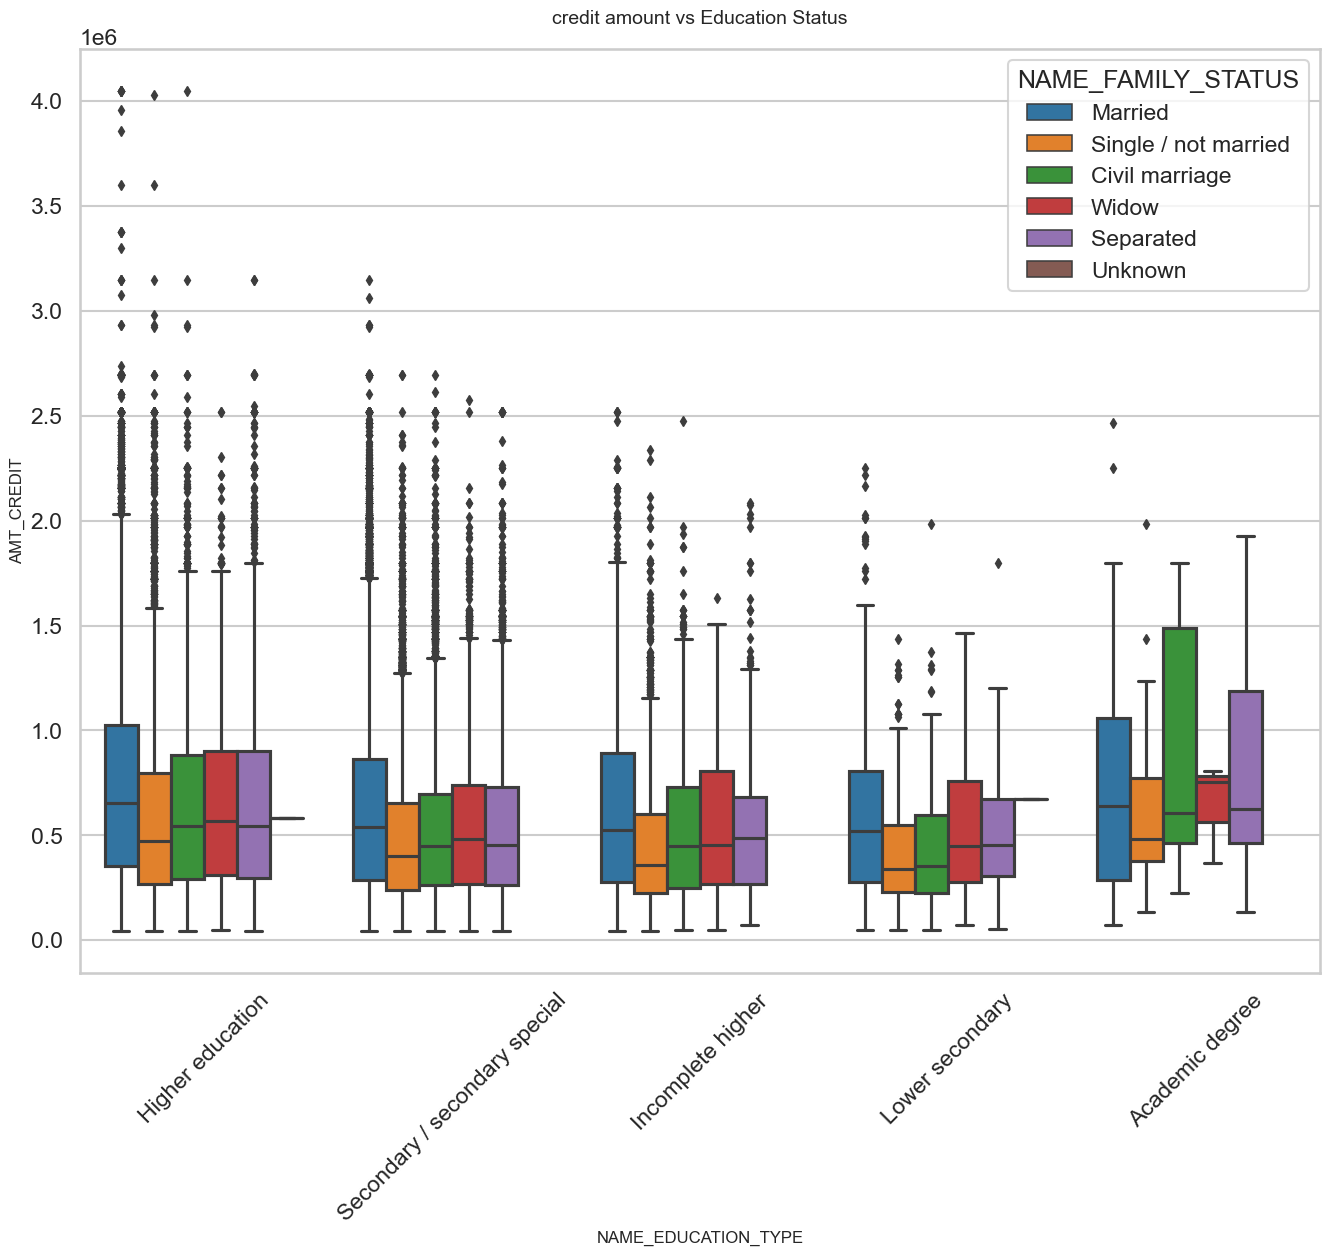

In [51]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('credit amount vs Education Status')
plt.show()

#observations from the graph:

- In the case of 'Academic degree' education, 'civil marriage' emerges as the dominant category, predominantly situated within the third quartile in terms of credit distribution.
- Among the various family status, individuals with 'civil marriage', 'marriage', and 'separated' trend to have a higher frequency of credits when possessing an Academic degree education.
- The 'marriage', 'single', and 'civil marriage' family statuses with higher education levels presents a greater number of outliers.


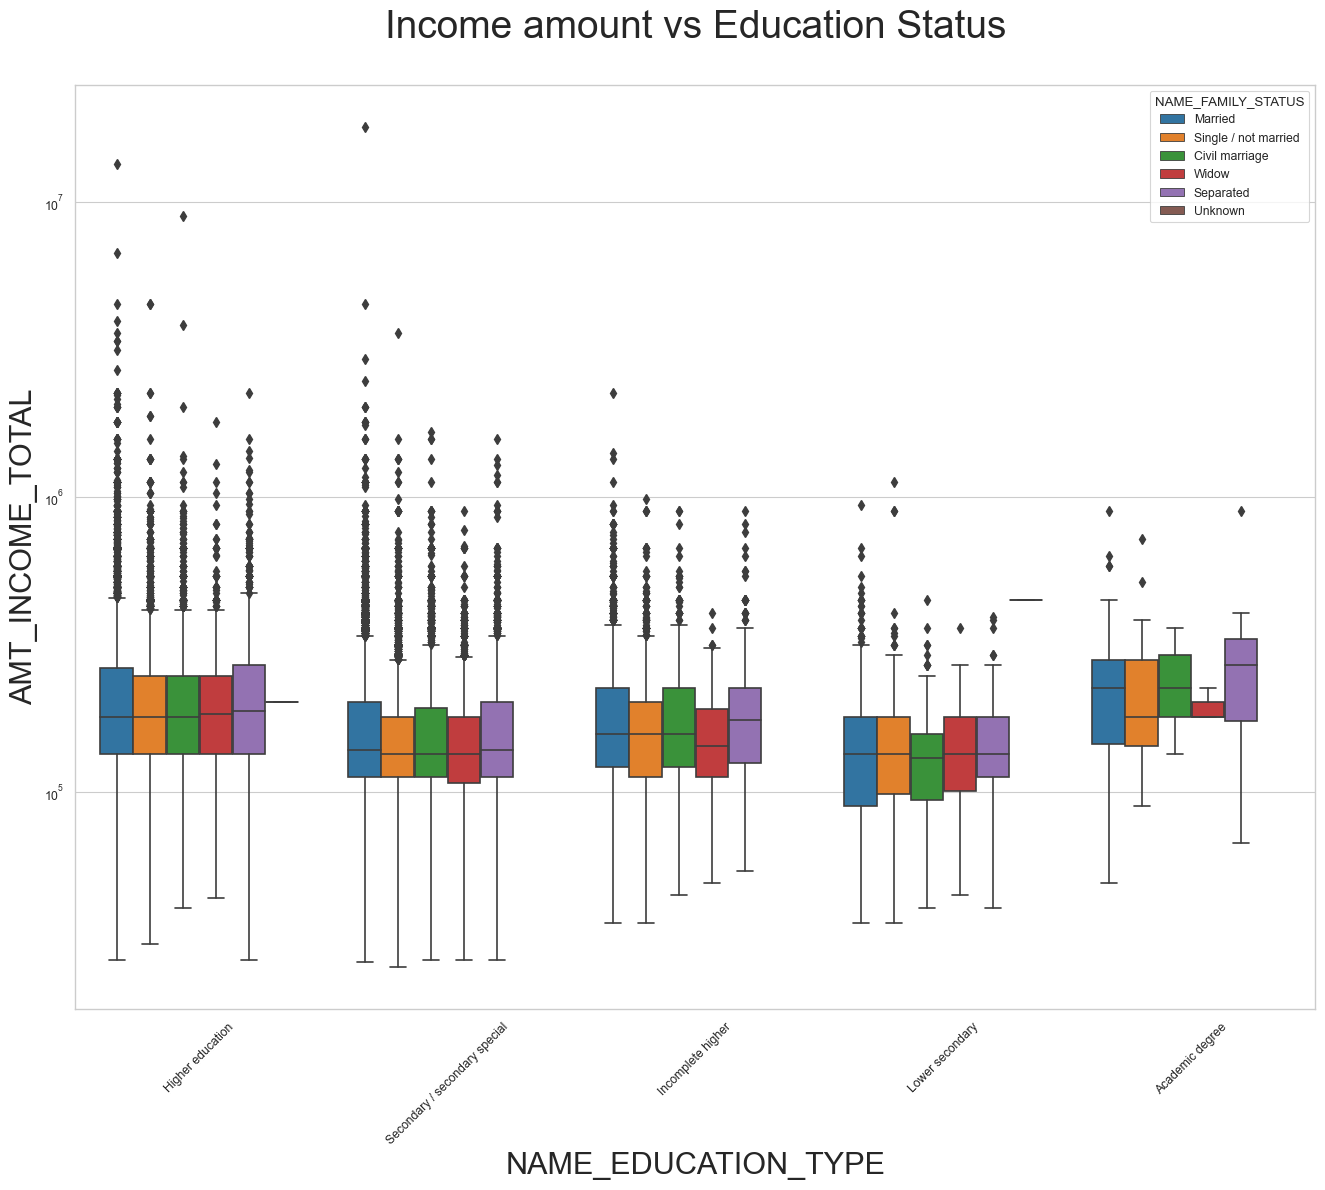

In [77]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

=> there Within the context of 'civil marriage' family status and 'Lower secondary' education, the income amount tends to be lower compared to other situations.

=>Analyzing the depicted boxplot for 'Higher education', it's evident that income amounts are predominantly comparable across various family statuses. While 'Academic degree' shows fewer outliers, its income levels are slightly higher than those for 'Higher education'.



### for target 1 credit amount

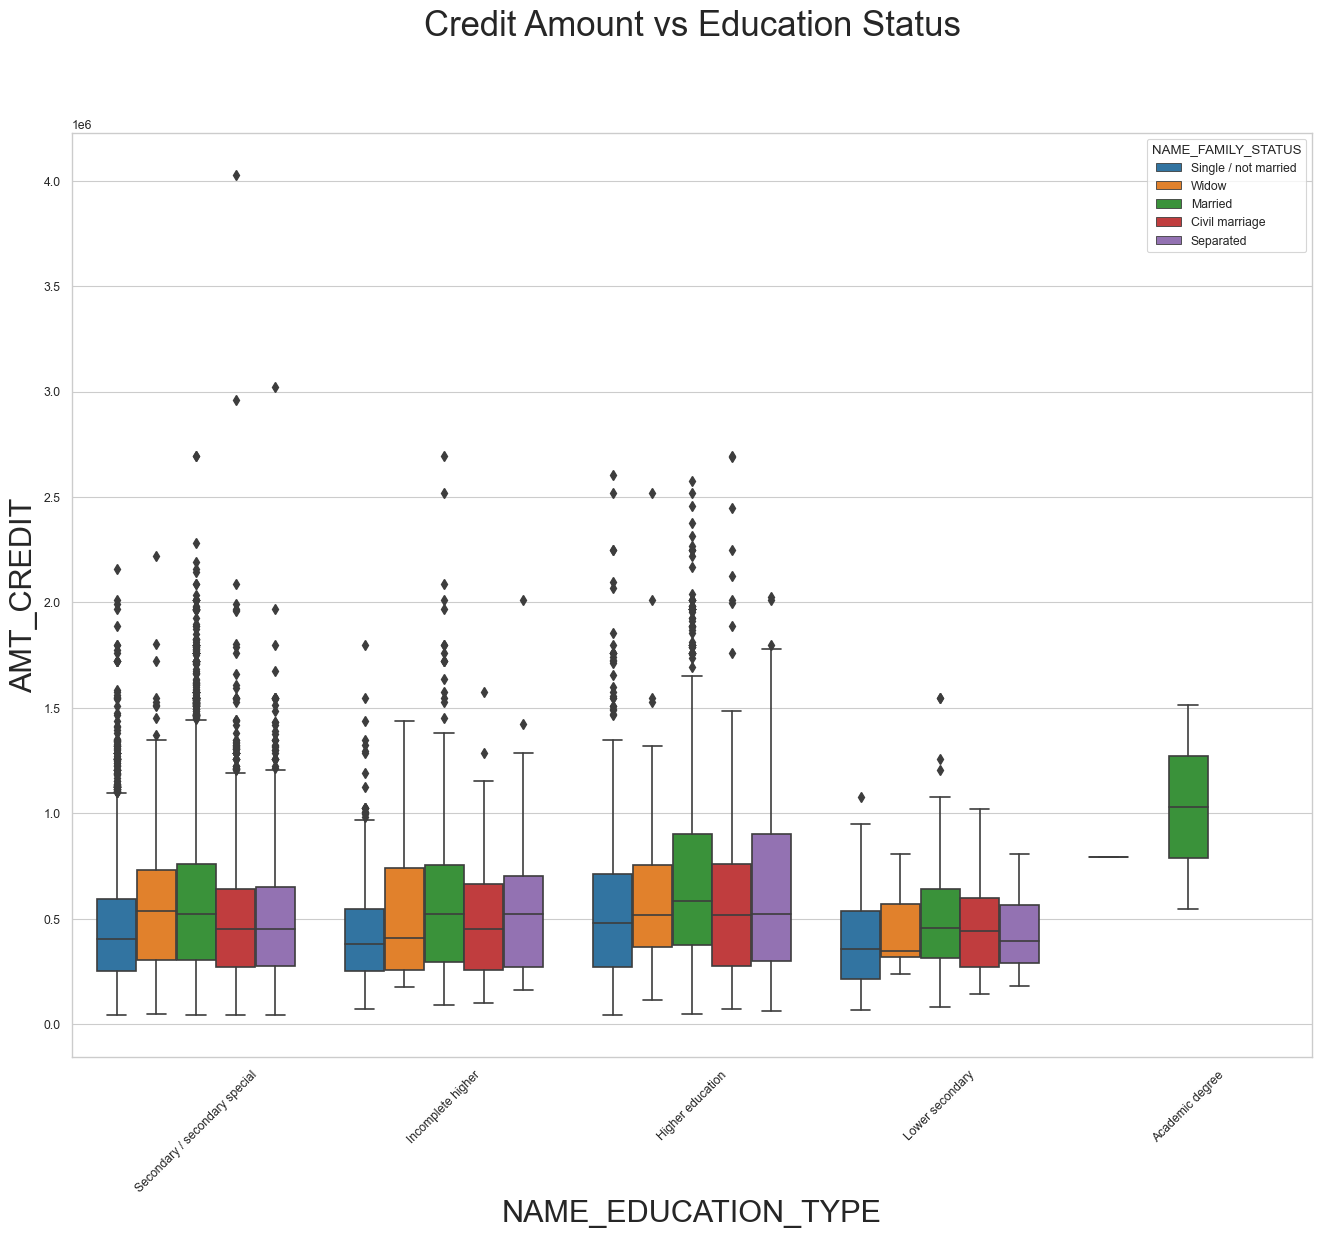

In [90]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

### observations:
- People who are low educated are more likely to default whereas people with higher education and academic degree are less likely to default.
- Most of the loans are given to married people and default rate is approx 8%. Single and Civil marriage folks have a default rate of 10.5% approximately. So comparingly Married people are less likely to default.
- Family statuses such as 'civil marriage', 'marriage', and 'separated', coupled with an Academic degree education, exhibit a greater propensity for higher credit counts compared to other cases.
- A substantial portion of outliers is apparent within 'Higher education' and 'Secondary' education categories.
- For 'Academic degree' education and 'civil marriage' family status, the third quartile predominantly encompasses the bulk of credit instances.

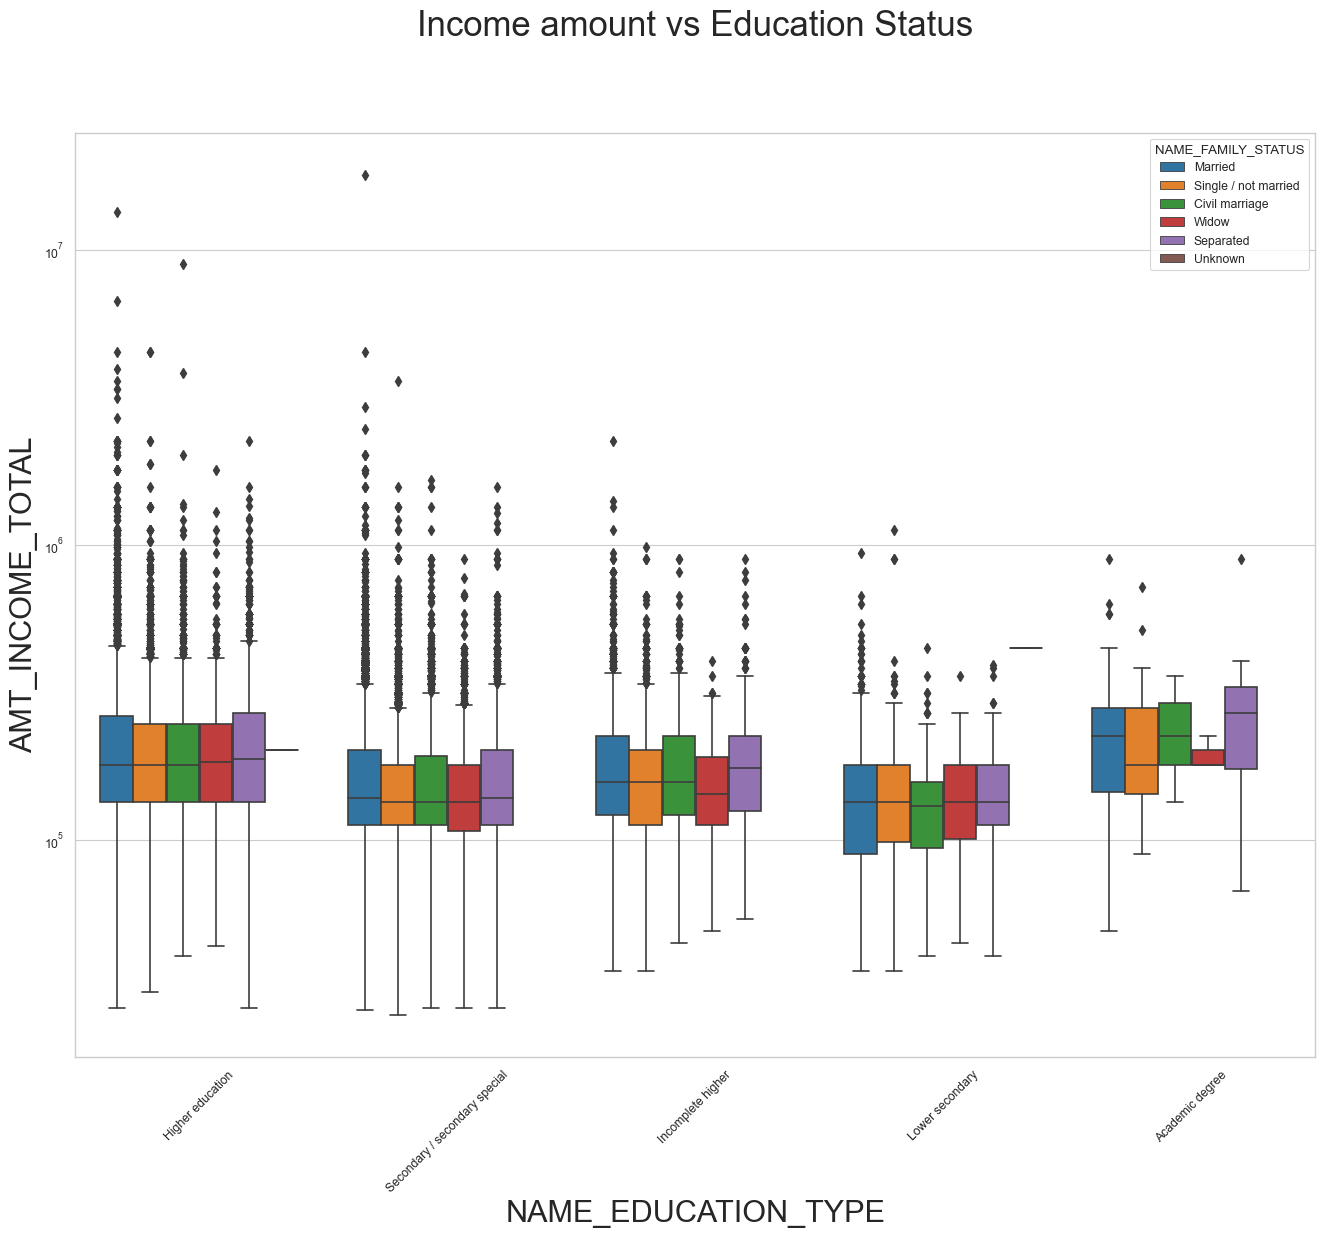

In [91]:
# Box plot for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

- In the provided box plot, when considering 'Higher education', the income amounts often align closely with various family statuses. 'Academic degree', while exhibiting fewer outliers, displays slightly elevated income levels compared to 'Higher education'.


### importing another dataset

In [100]:
# importing the dataset of previous application

prev_appdata =pd.read_csv('previous_application.csv')
prev_appdata.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## checking the null values

In [101]:
emptycol1=prev_appdata.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [102]:
# deleting columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
prev_appdata.drop(labels=emptycol1,axis=1,inplace=True)
prev_appdata.shape

(1670214, 22)

In [95]:
# z the column values of 'XNA' and 'XAP'

prev_appdata=prev_appdata.drop(prev_appdata[prev_appdata['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_appdata=prev_appdata.drop(prev_appdata[prev_appdata['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_appdata=prev_appdata.drop(prev_appdata[prev_appdata['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [103]:
prev_appdata.shape

(1670214, 22)

### Merging the Application dataset with previous application dataset

In [104]:
new_app_data=pd.merge(left=app_data,right=prev_appdata,how='inner',on='SK_ID_CURR',suffixes='_x')
new_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle


In [105]:
# Renaming the column names after merging

new_app_data = new_app_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [106]:
# Removing unwanted columns for analysis

new_app_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

### univariate analysis

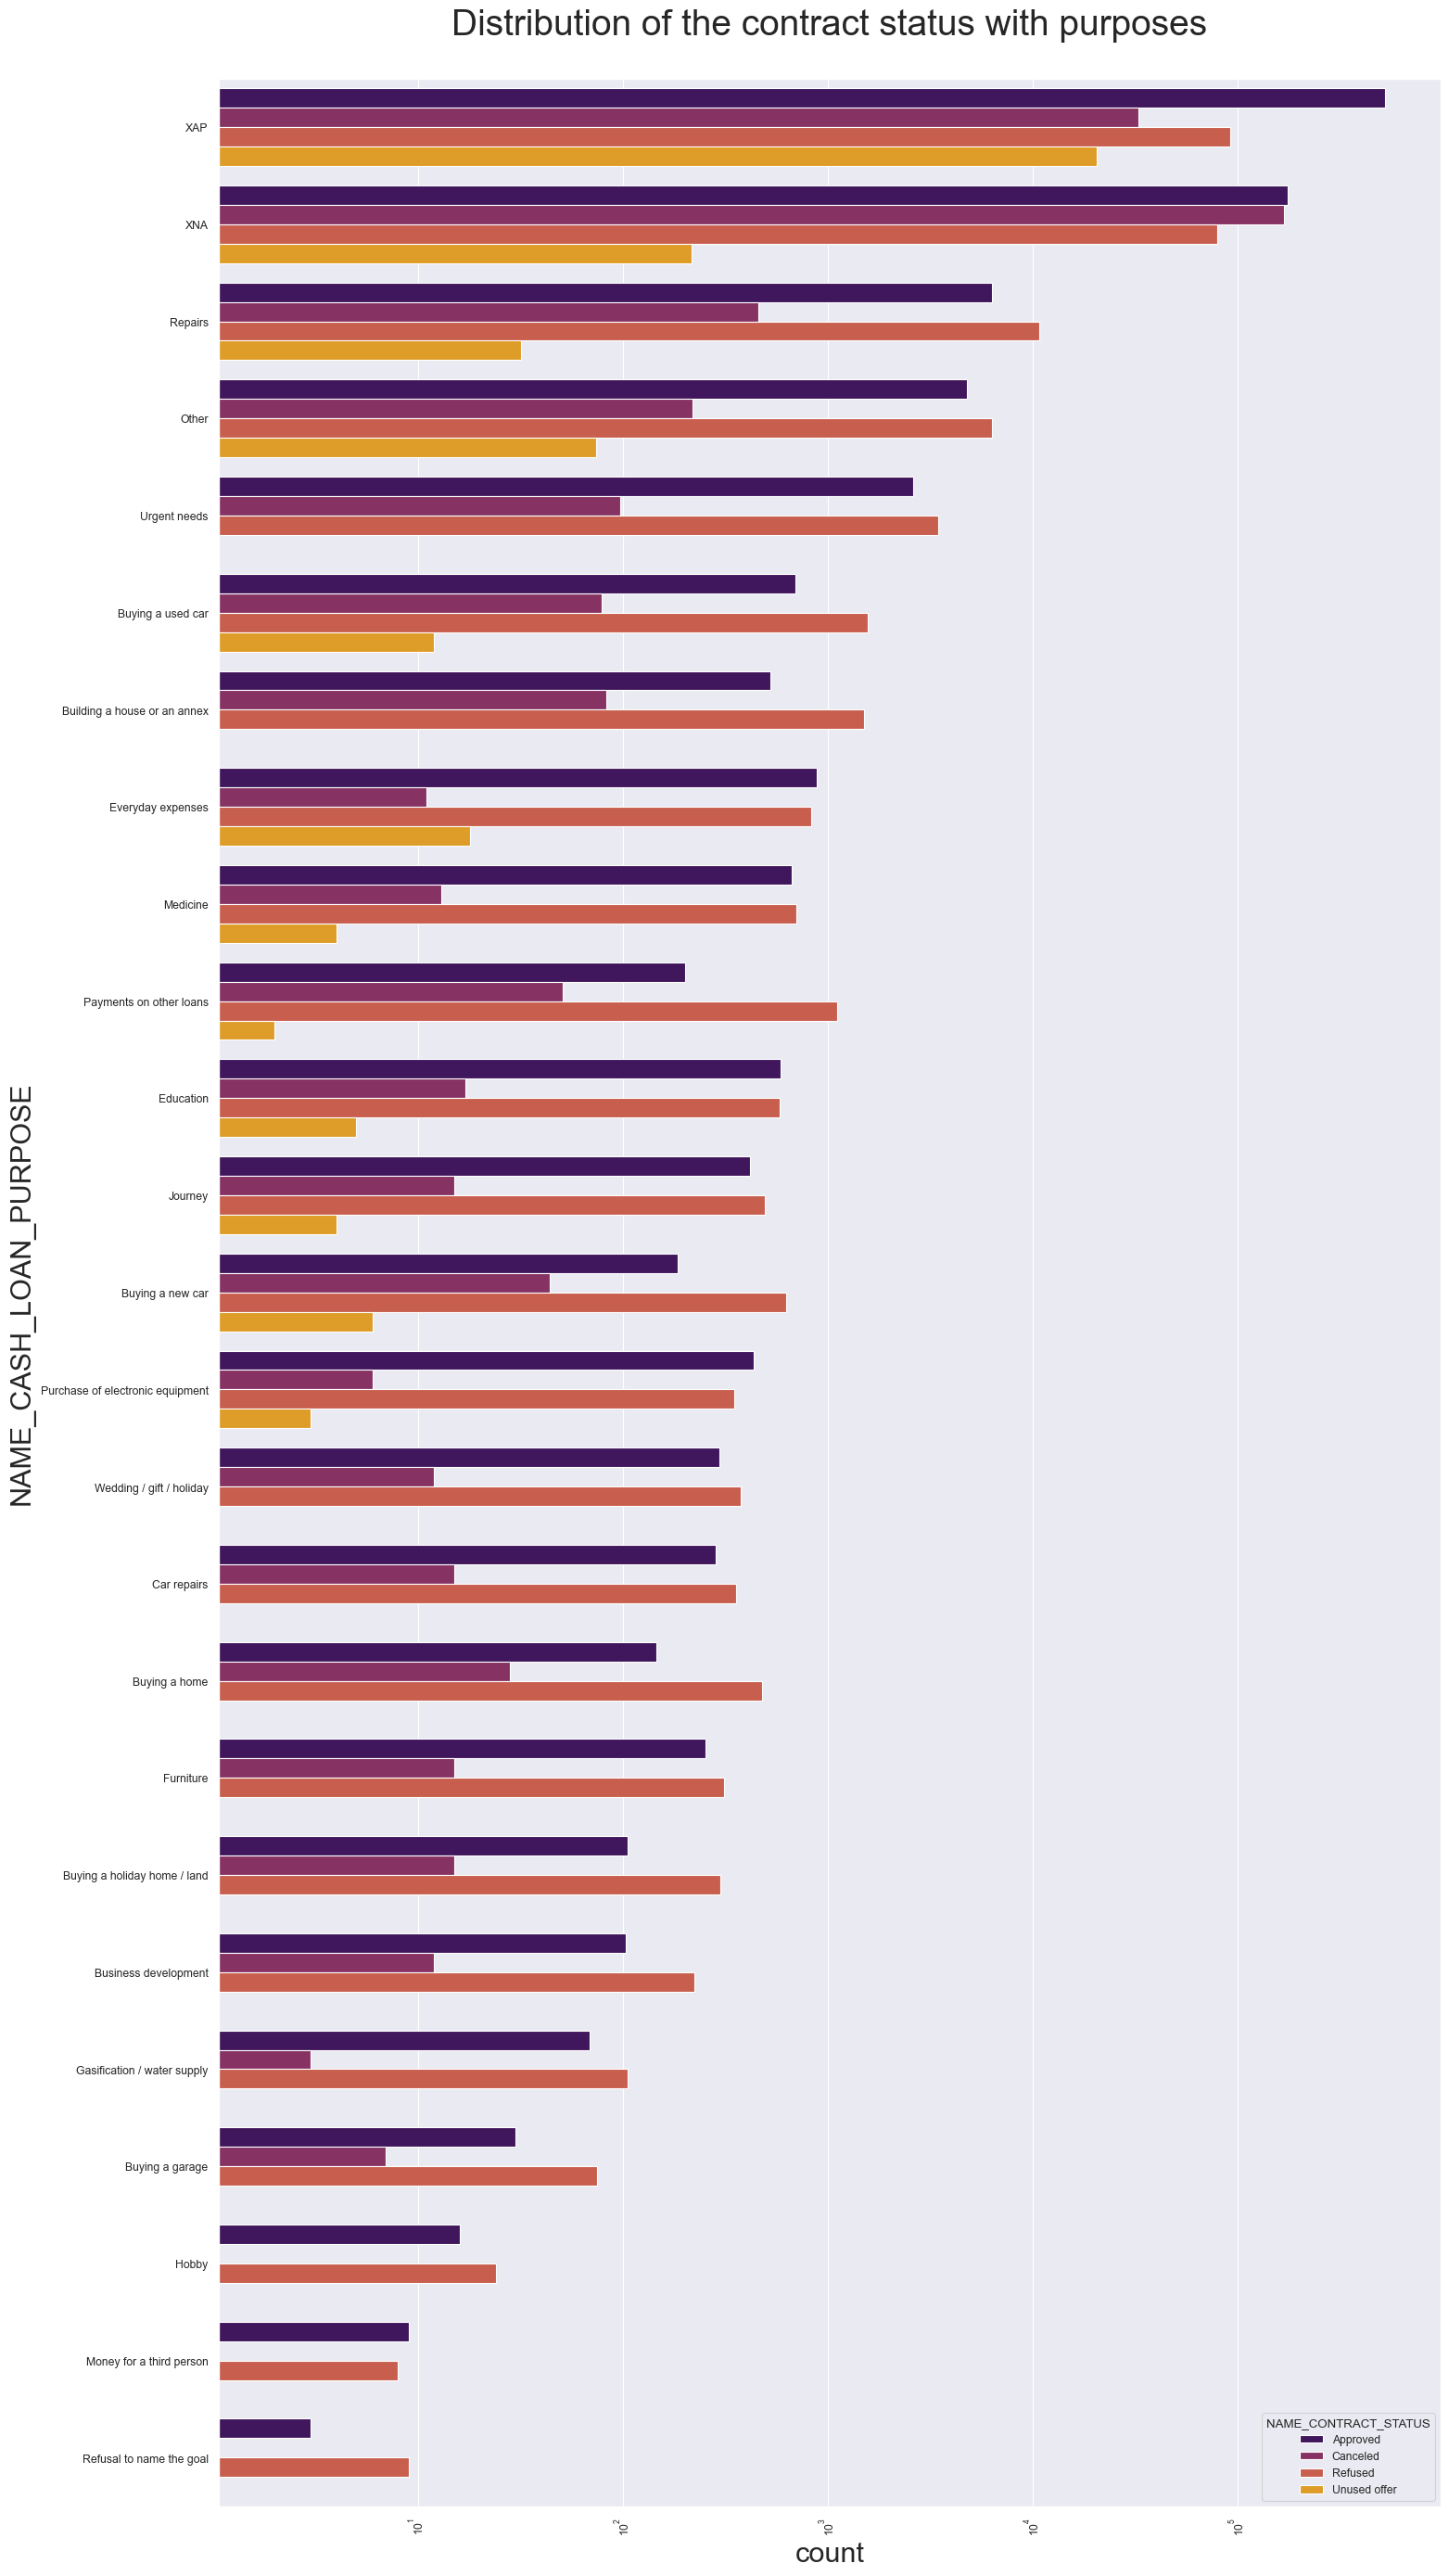

In [107]:
# Distribution of contract status in logarithmic scale

sns.set_style('darkgrid')
sns.set_context('paper')

plt.figure(figsize=(17,34))
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titlepad'] = 34
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of the contract status with purposes')
ax = sns.countplot(data = new_app_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_app_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='inferno') 

observations from the above plot:

- loan rejections significantly outweigh approvals for purposes involving 'Paying other loans' and 'Buying a new car'.
- 'Repairs' emerge as the primary reason for loan rejections.
- Educational purposes yield an equilibrium between loan approvals and rejections.



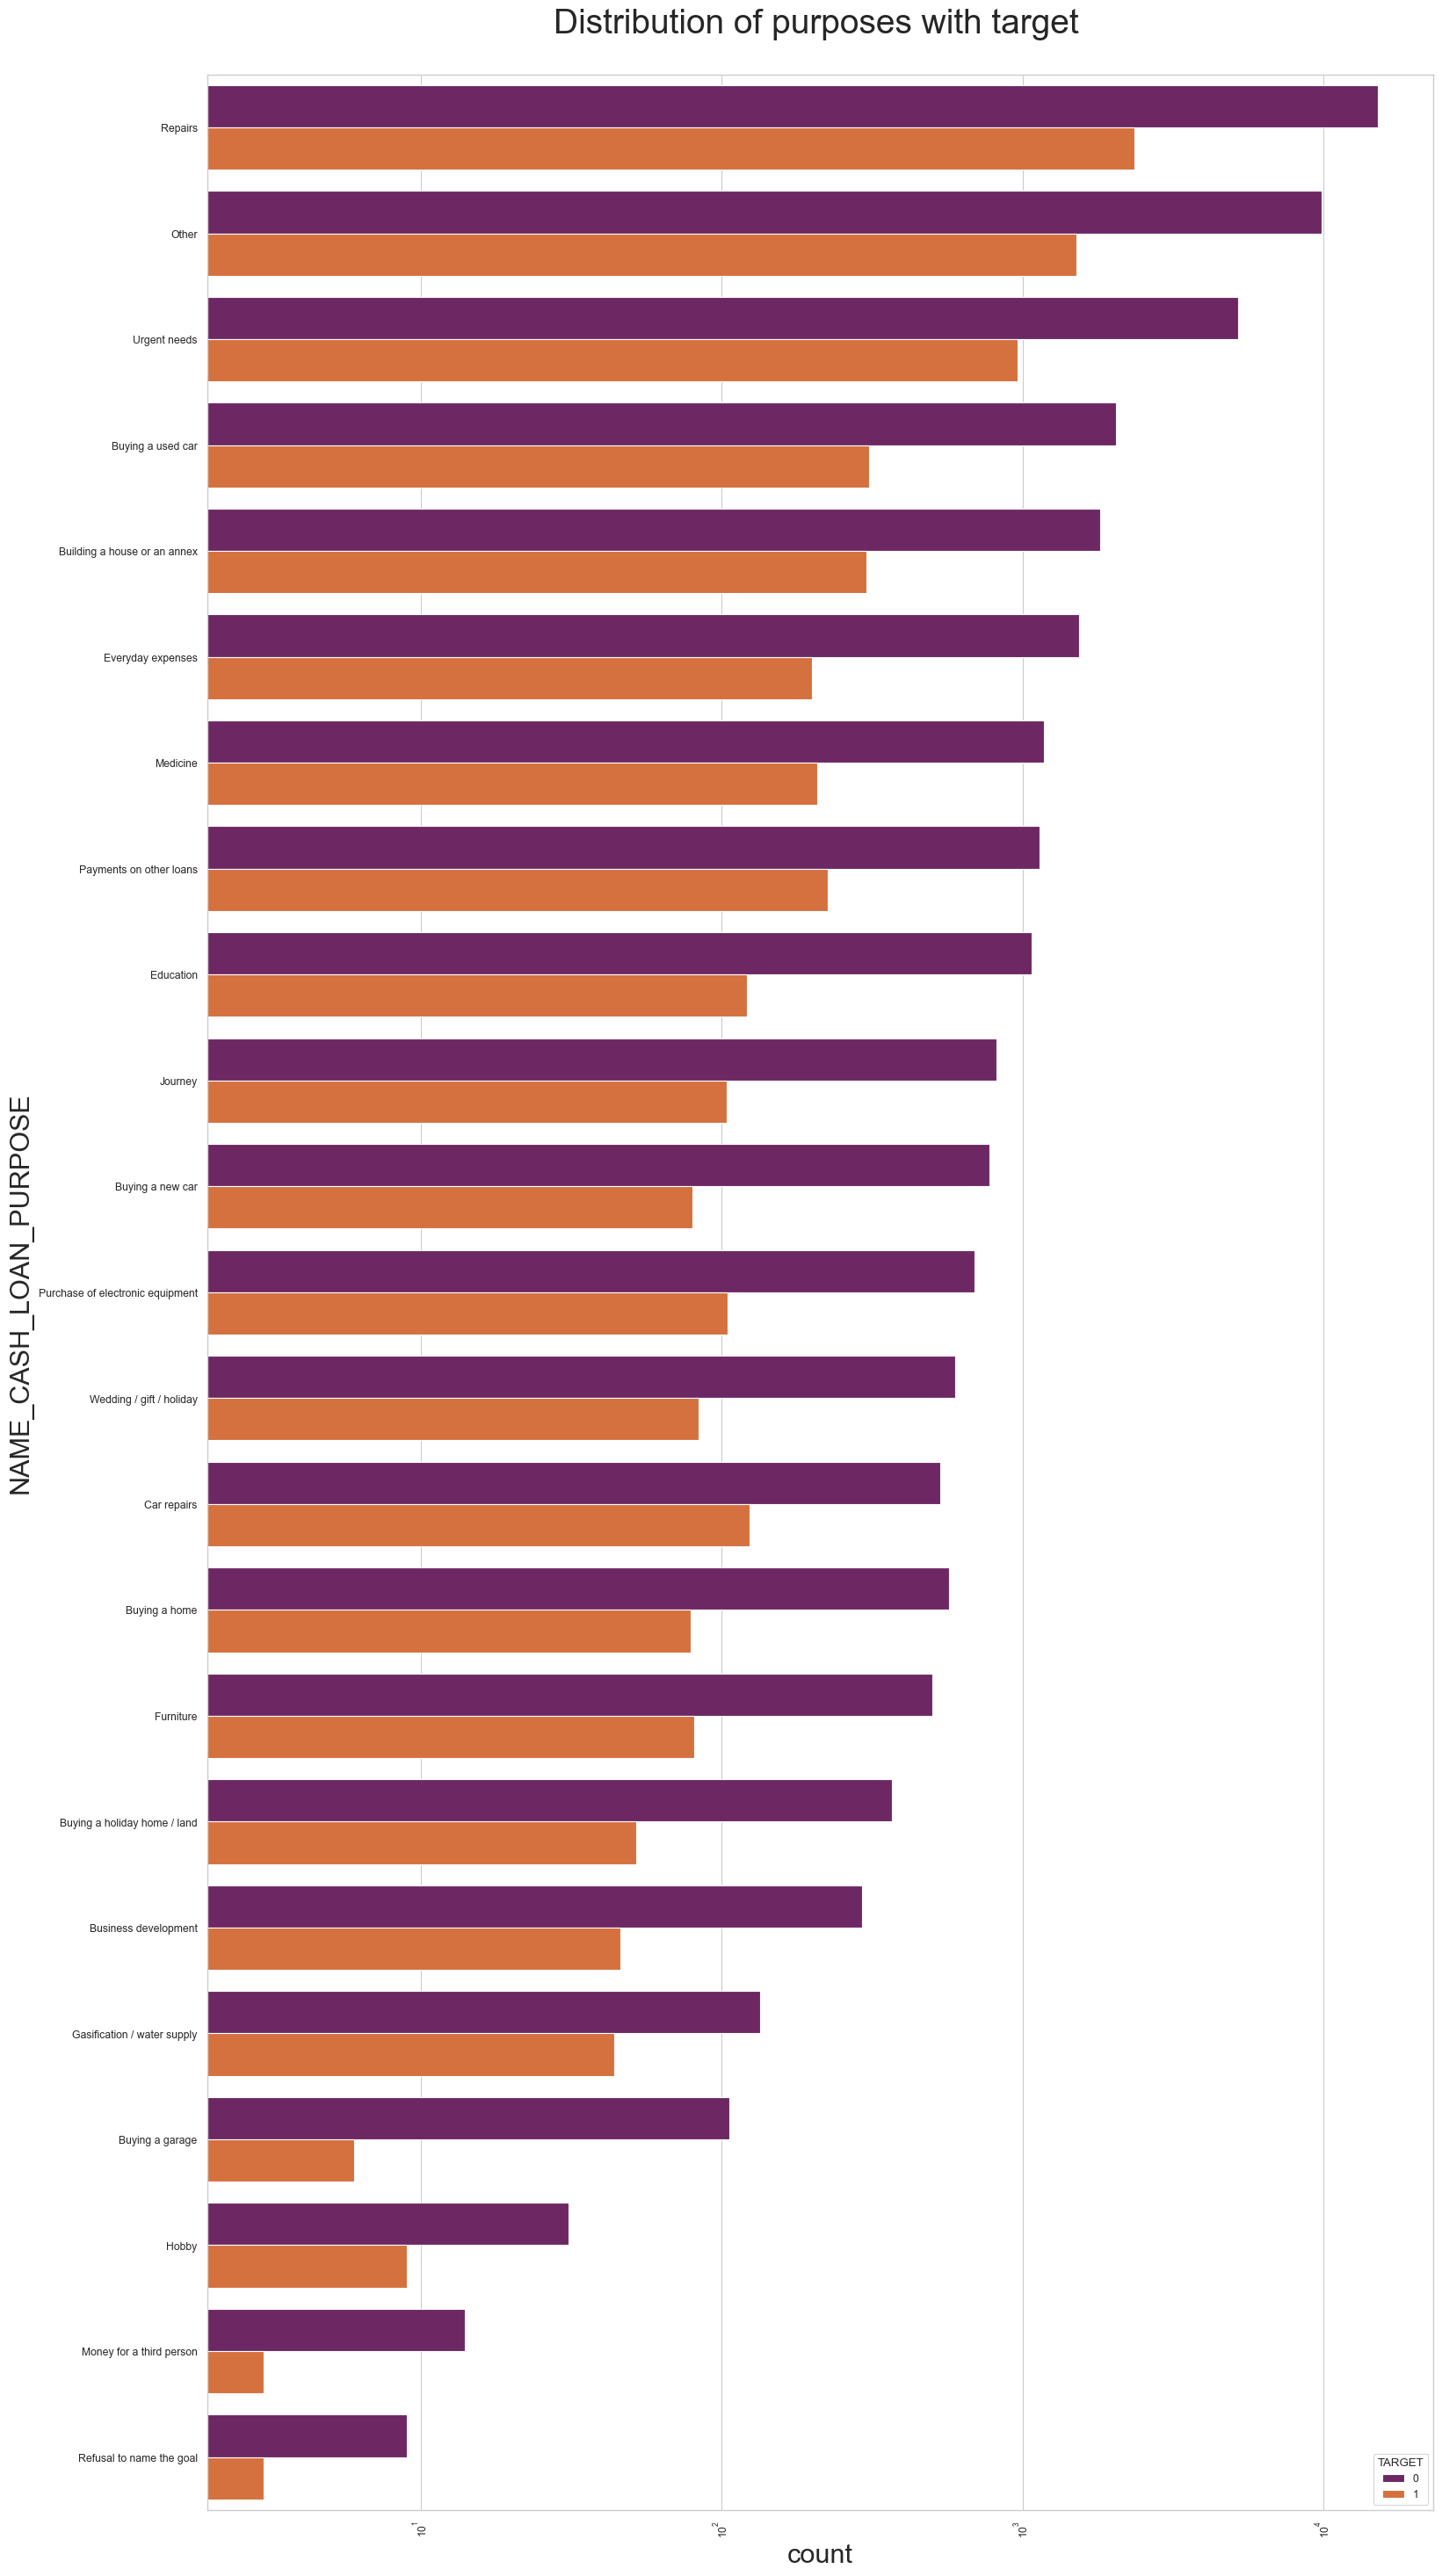

In [73]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(figsize=(18,36))
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titlepad'] = 34
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_app_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_app_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='inferno') 

Observations:

- Notably, specific loan purposes exhibit a notably higher propensity for successful repayments. These purposes include 'Buying a garage,' 'Business development,' 'Buying land,' 'Buying a new car,' and 'Education.' Thus, these purposes merit focused attention due to their association with minimal payment difficulties.
- Borrowers who utilize loans for 'Repairs' facing greater challenges in making timely payments.


### bivariate analysis

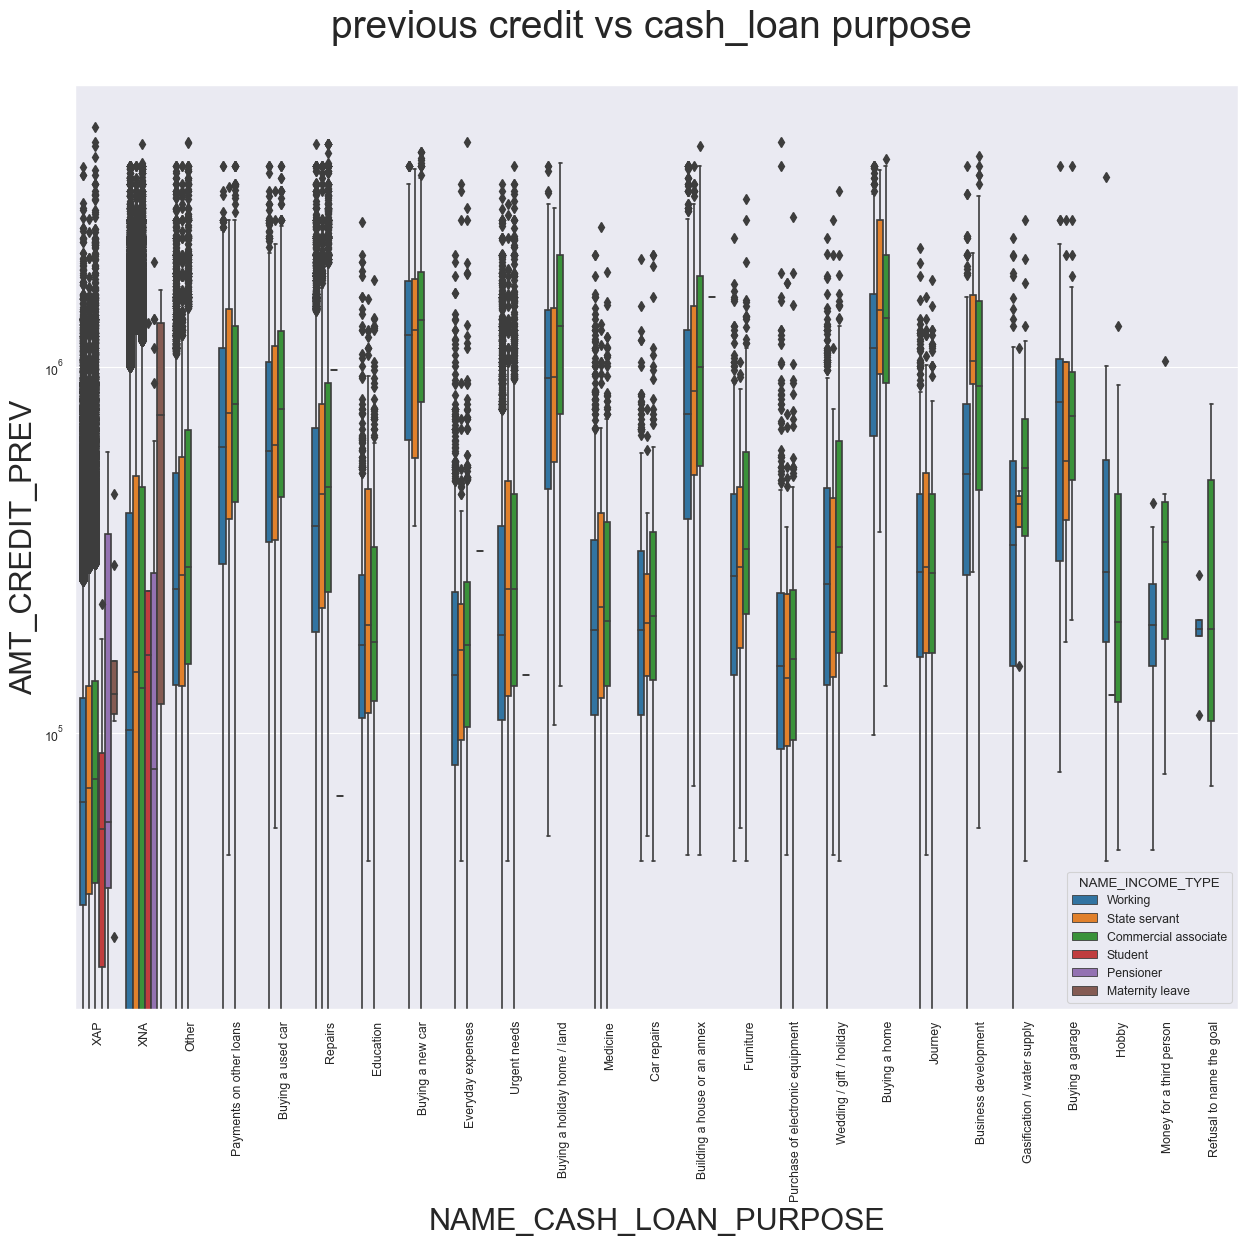

In [111]:
# Box Plotting for credit amount

plt.figure(figsize=(15,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data= new_app_data, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_PREV', orient='v')
plt.title('previous credit vs cash_loan purpose ')
plt.show()

observations:

- Applicants classified as state servants exhibit a noteworthy demand for credit.
- Loan purposes such as 'Buying a home,' 'Buying land,' 'Buying a new car,' and 'Building a house' are associated with higher credit amounts.


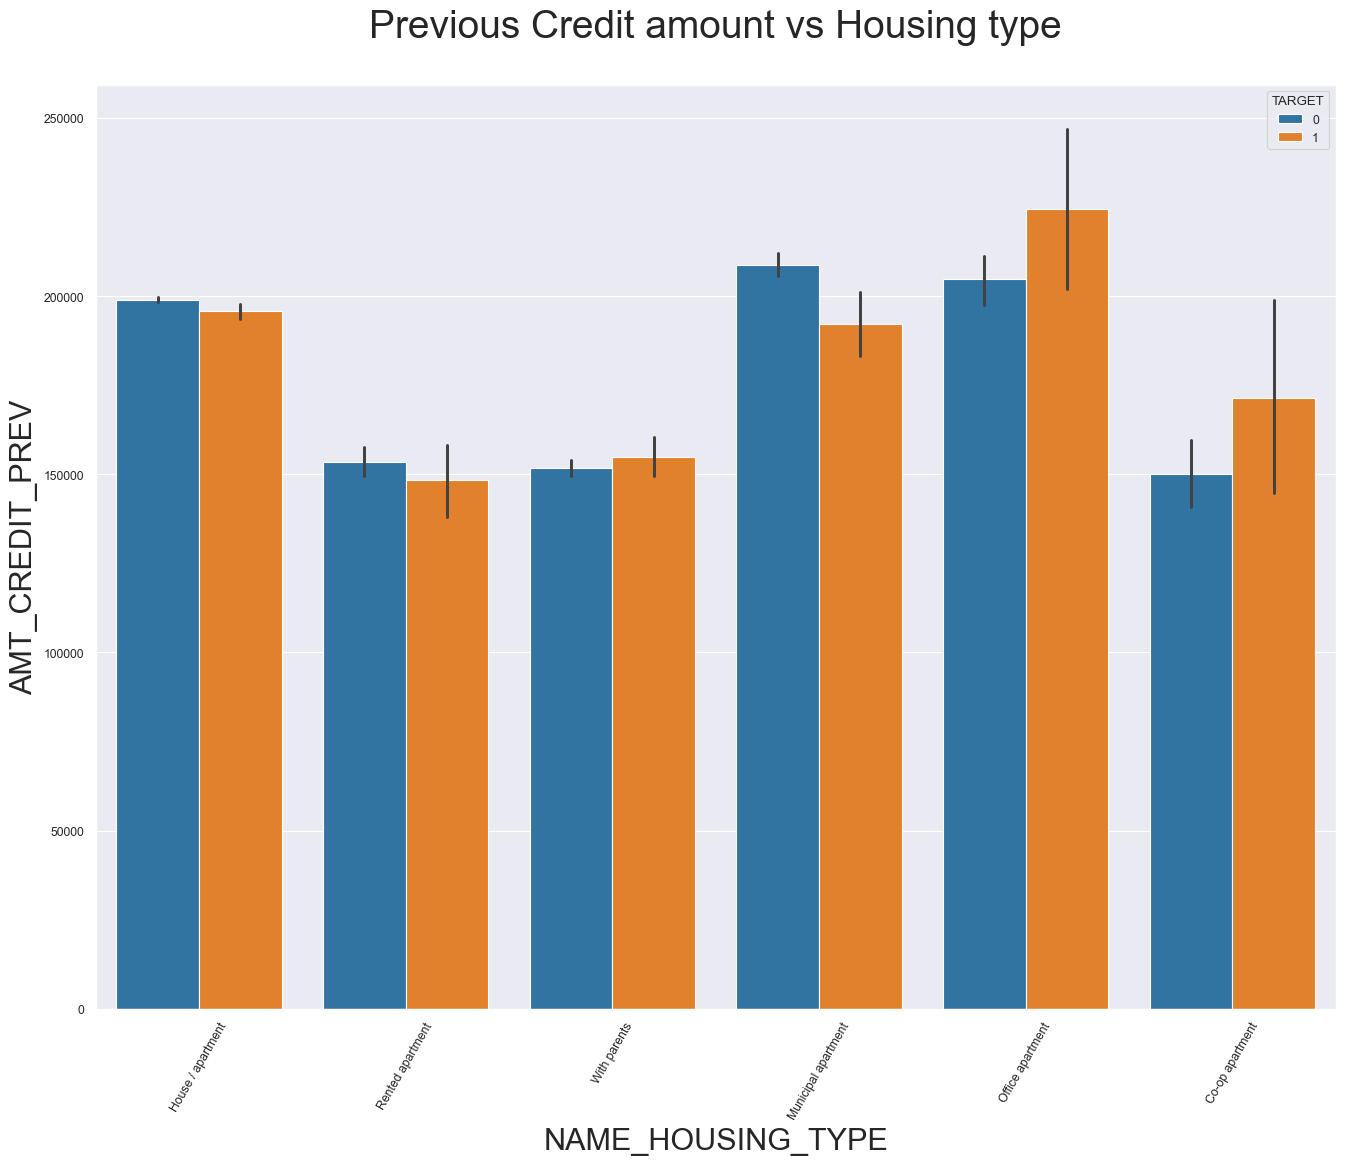

In [110]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=60)
sns.barplot(data =new_app_data, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Previous Credit amount vs Housing type')
plt.show()


- 'Office apartment' housing type shows  a occurrence for  credit target 0, when 'Co-op apartment' housing type is  related with the  credit target 1.
- Loan purposes such as 'Buying a home,' 'Buying land,' 'Buying a new car,' and 'Building a house' are associated with higher credit amounts.



## Final conclusion:

- Married individuals default less than single or civil-married counterparts and parental statuses are also impacting default rates.
- Higher-educated clients shows better repayment behavior.
- Certain occupations, like low-skilled laborers and drivers, are prone to higher default rates.
- Higher incomes correlate with lower defaults, but extreme high incomes again has higher default risk.
- loans intended for the purpose of 'Repair' show a higher frequency of untimely payment issues.
- Targeting clients from the 'With parents' housing type could prove advantageous,
- Advise for banks to prioritize individuals with contract types 'Student,' 'Pensioner,' and 'Businessman' who possess housing types other than 'Co-op apartment' for high favorable payment returns.
